In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json
import gmaps
import warnings
from scipy import stats
import matplotlib.image as mpimg

# Google API Key
from api_keys import gkey

# Configure gmaps
gmaps.configure(gkey)

In [2]:
#setting background of figure 
plt.style.use('ggplot')

In [3]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Reading clean California census data for plotting

In [4]:
#reading 2012 clean california census data
path_ca_2012=os.path.join('output_census', 'ca_2012_fg.csv')
ca_2012=pd.read_csv(path_ca_2012)

#reading 2014 clean california census data
path_ca_2014=os.path.join('output_census', 'ca_2014_fg.csv')
ca_2014=pd.read_csv(path_ca_2014)

#reading 2015 clean california census data
path_ca_2015=os.path.join('output_census', 'ca_2015_fg.csv')
ca_2015=pd.read_csv(path_ca_2015)

#reading 2017 clean california census data
path_ca_2017=os.path.join('output_census', 'ca_2017_fg.csv')
ca_2017=pd.read_csv(path_ca_2017)

#reading 2019 clean california census data
path_ca_2019=os.path.join('output_census', 'ca_2019_fg.csv')
ca_2019=pd.read_csv(path_ca_2019)

#reading 2019 clean california census data
path_usa_2019=os.path.join('output_census', 'census_comb_2019.csv')
usa_2019=pd.read_csv(path_usa_2019)

# California Census Figures

### Scatter Matrix plot

Scatter Matrix for 2019 data


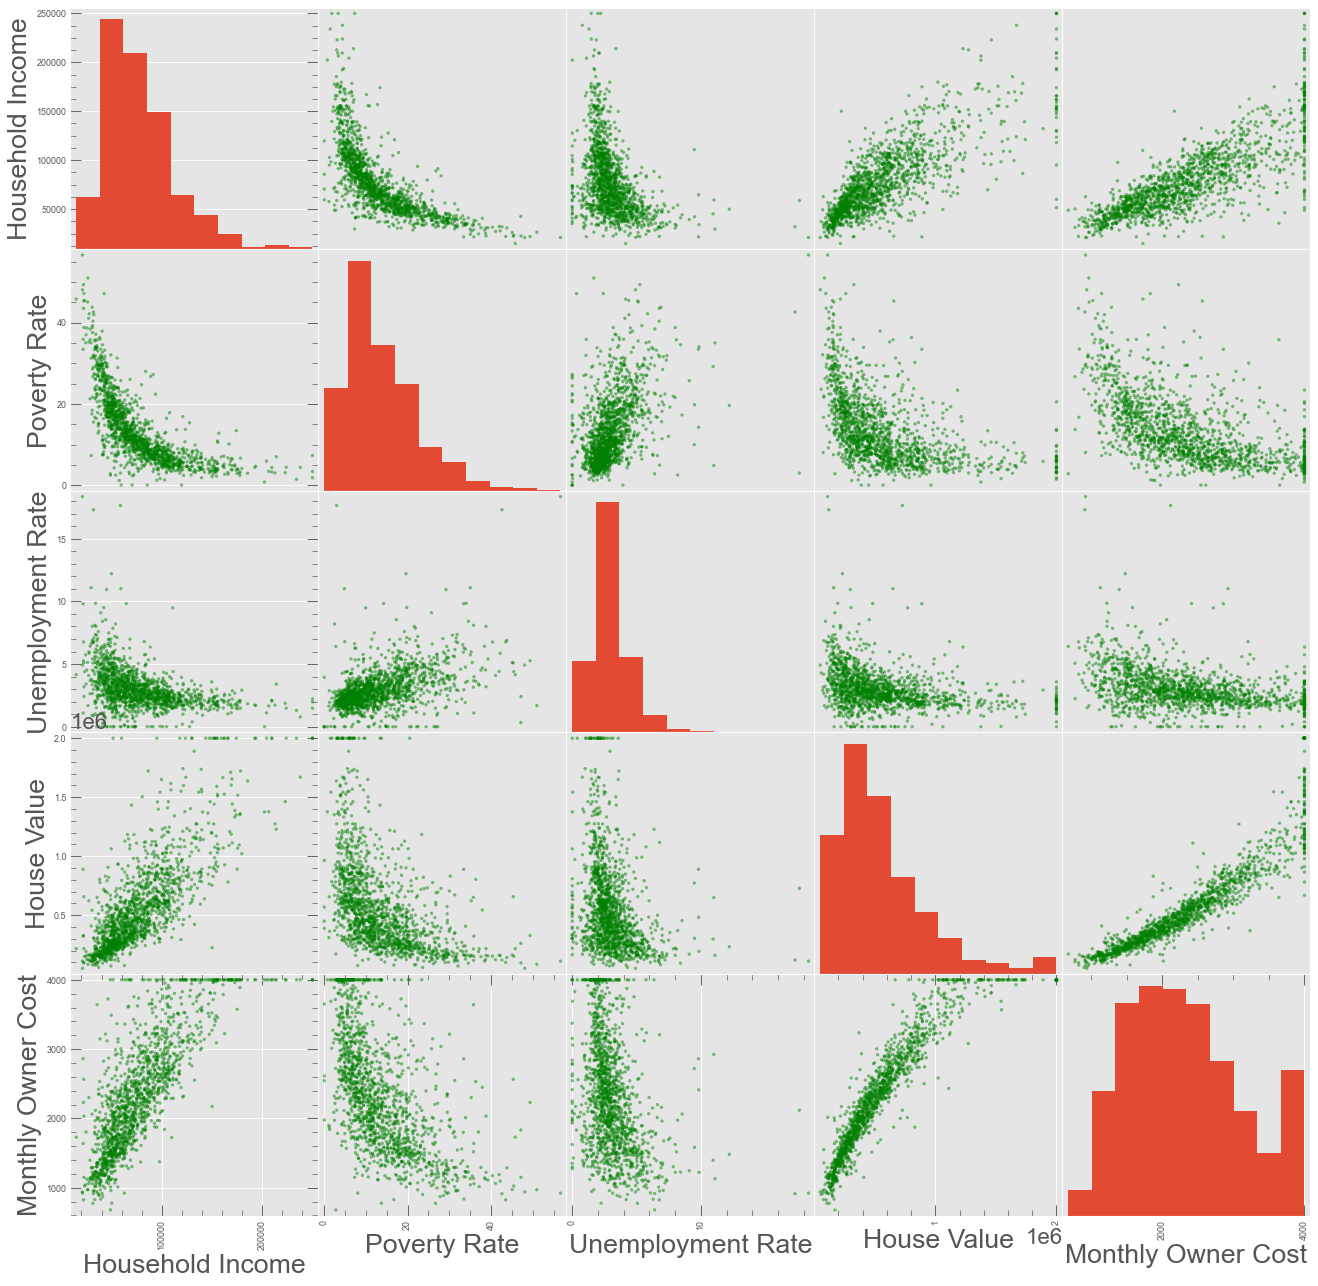

********************************************************************************


In [5]:
# to plot all selected columns
all_datas=[ca_2019]
years=[ '2019']
for i, data in enumerate(all_datas):
    print(f'Scatter Matrix for {years[i]} data')
    col=data[[ 'Household Income',
        'Poverty Rate', 'Unemployment Rate', 'House Value',
        'Monthly Owner Cost', ]]
    pd.plotting.scatter_matrix(col,c='g', figsize=(20,20))
    plt.show()
    print('*'*80)
    

## Latitude and Longitude plots

Plots for 2019


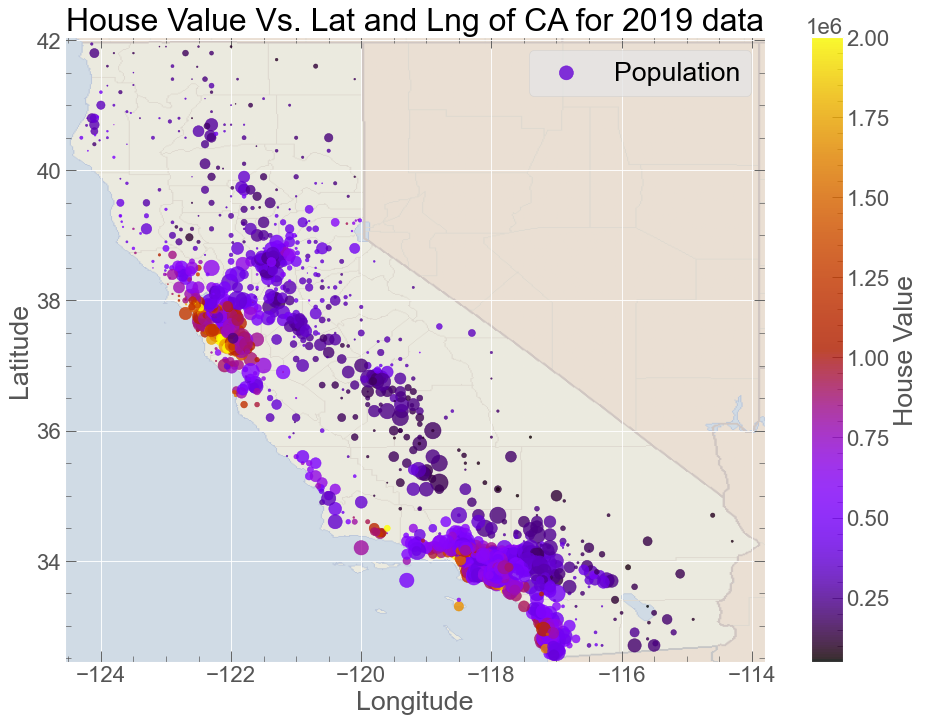

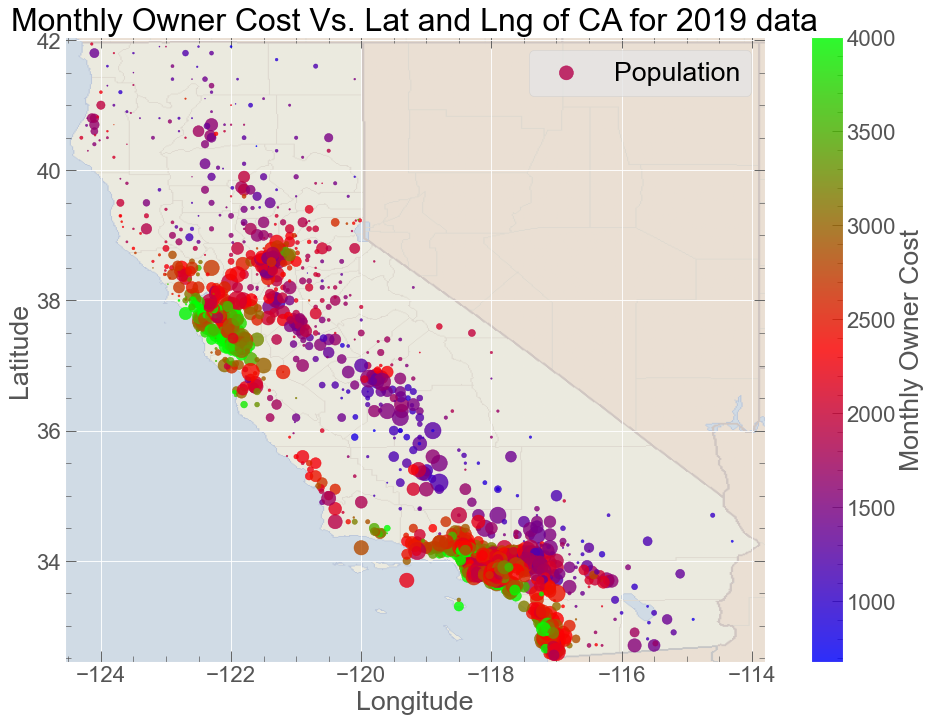

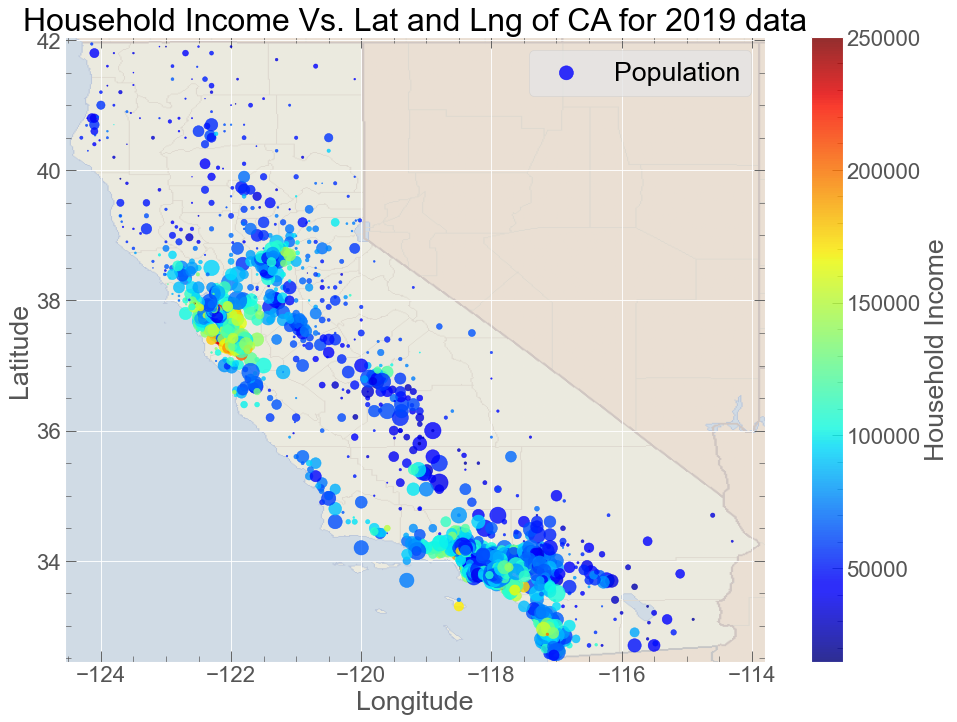

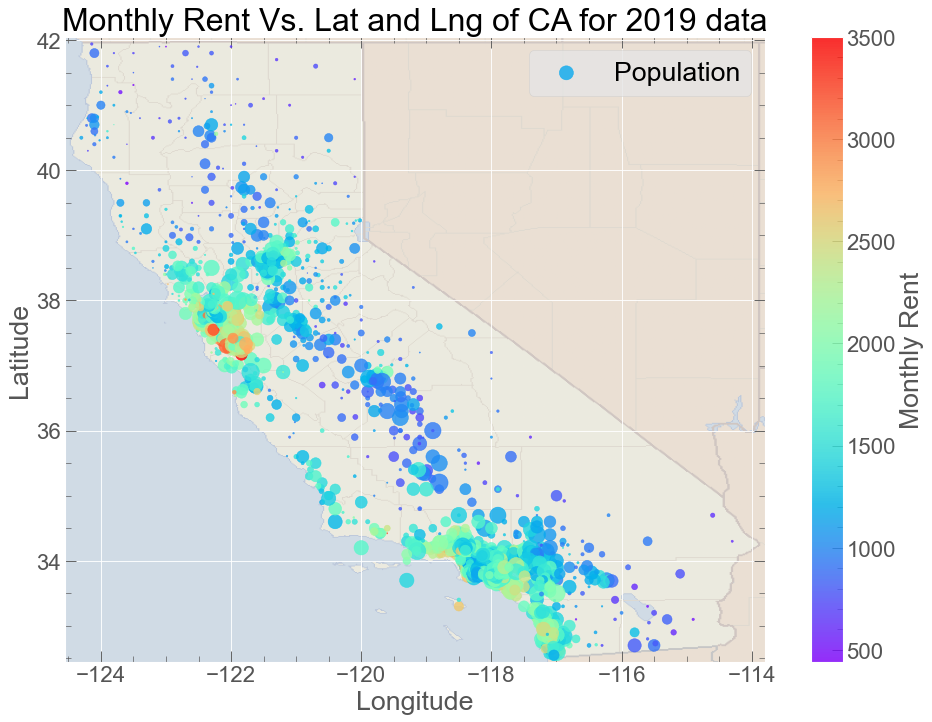

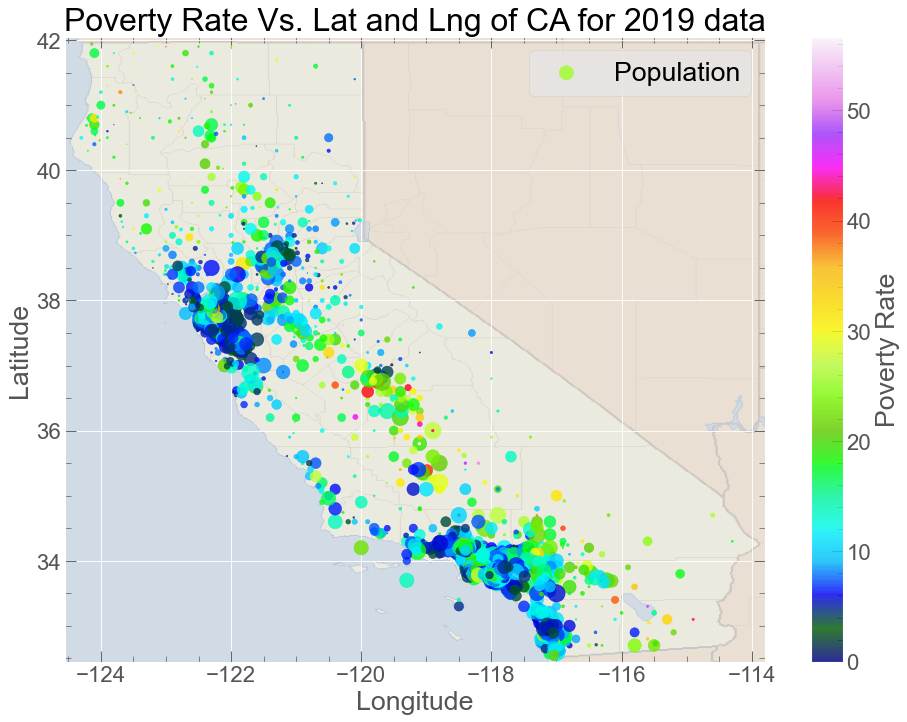

********************************************************************************


In [6]:
#
cali_img=mpimg.imread(os.path.join('Others', 'california.png'))
all_datas=[ca_2019]
years=[ '2019']
cols=['House Value','Monthly Owner Cost','Household Income',
  'Monthly Rent','Poverty Rate']
cmap=['gnuplot', 'brg','jet', 'rainbow', 'gist_ncar']
warnings.filterwarnings("ignore")
for i, data in enumerate(all_datas):
    print(f'Plots for {years[i]}')
    for j in range(1, 6):
        fig = plt.figure(figsize=(15,60))
        ax = fig.add_subplot(5, 1, j)
    
        data.plot(kind='scatter', x='Lng', y='Lat', alpha=0.8, 
                s=data['Population']/350,label='Population',
                 c=cols[j-1], cmap=plt.get_cmap(cmap[j-1]),
                colorbar=True, ax=ax)
        im=ax.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3,
           cmap=plt.get_cmap("jet"))
        ax.set_title(f'{cols[j-1]} Vs. Lat and Lng of CA for {years[i]} data')
        ax.set(xlabel="Longitude", ylabel="Latitude")
        fig.savefig(f'figures/lat_Vs_lng_vs_{cols[j-1]}.png', bbox_inches="tight")
        plt.show()
    print('*'*80)
    


## Scatter plots

Plots for 2019


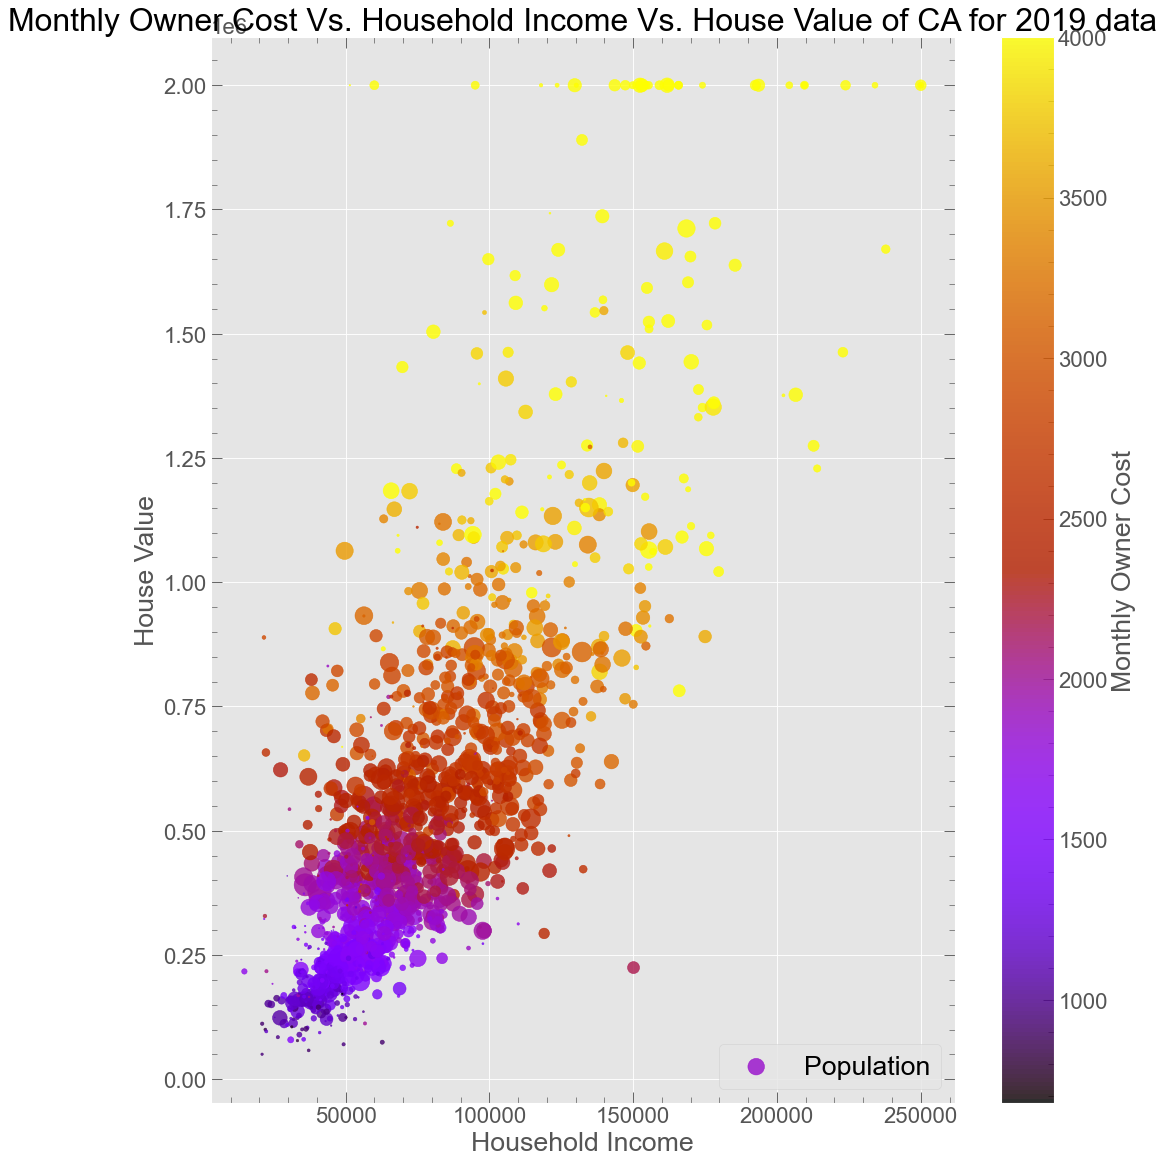

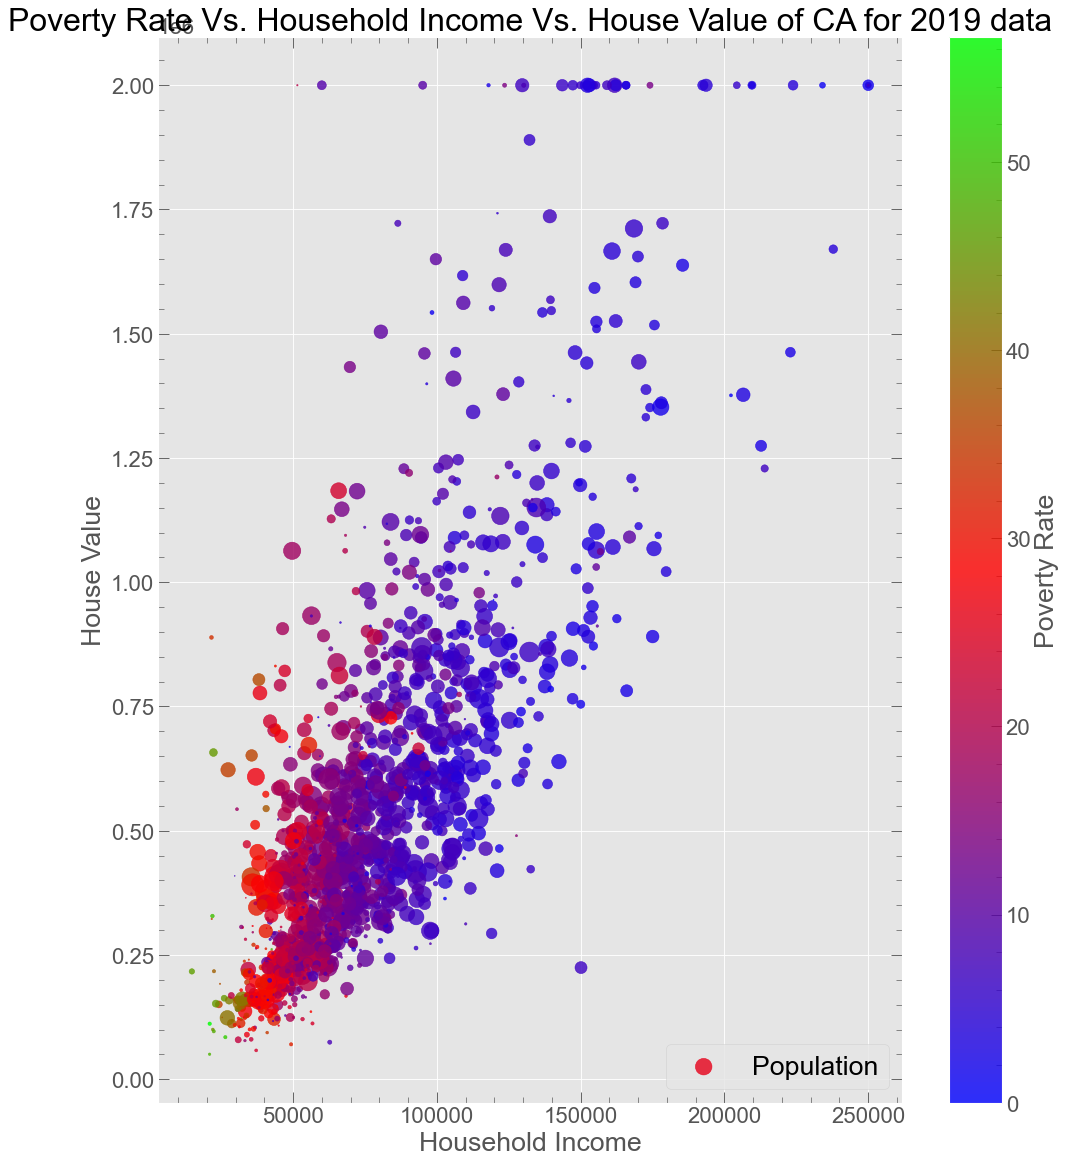

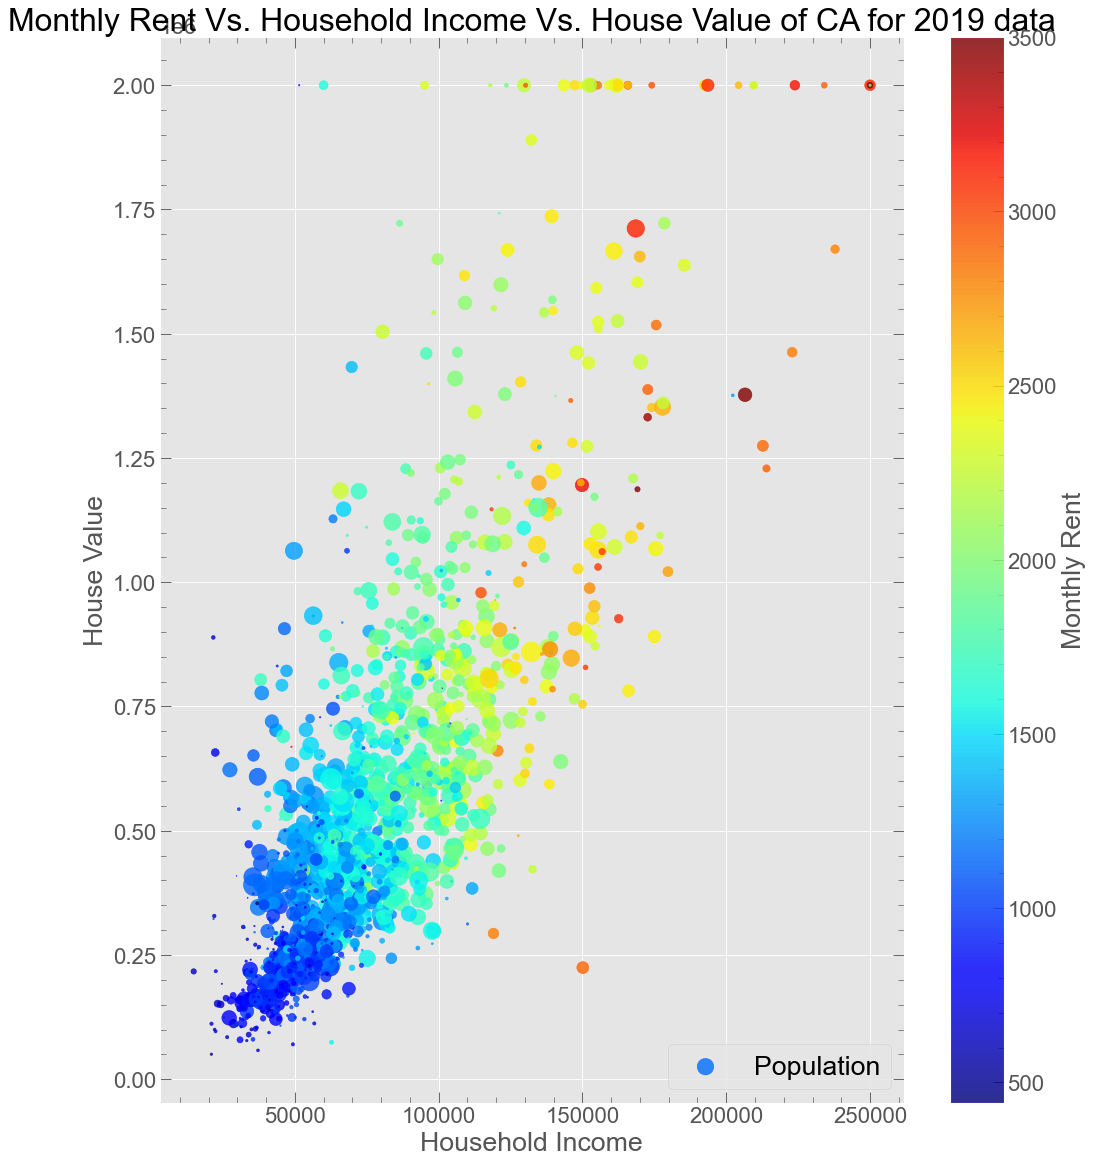

********************************************************************************


In [7]:
#
all_datas=[ca_2019]
years=[ '2019']
cols=['Monthly Owner Cost','Poverty Rate',
  'Monthly Rent']
cmap=['gnuplot', 'brg','jet', 'rainbow', 'gist_ncar']
for i, data in enumerate(all_datas):
    print(f'Plots for {years[i]}')
    for j in range(1, 4):
        fig = plt.figure(figsize=(15,60))
        ax = fig.add_subplot(3, 1, j)
    
        data.plot(kind='scatter', x='Household Income', y='House Value', alpha=0.8, 
                s=data['Population']/250,label='Population',
                 c=cols[j-1], cmap=plt.get_cmap(cmap[j-1]),
                colorbar=True, ax=ax)

        ax.set_title(f'{cols[j-1]} Vs. Household Income Vs. House Value of CA for {years[i]} data')
        fig.savefig(f'figures/HV_VS_HI_{cols[j-1]}.png', bbox_inches="tight")
        plt.show()
    print('*'*80)


Plots for 2019


NameError: name 'color' is not defined

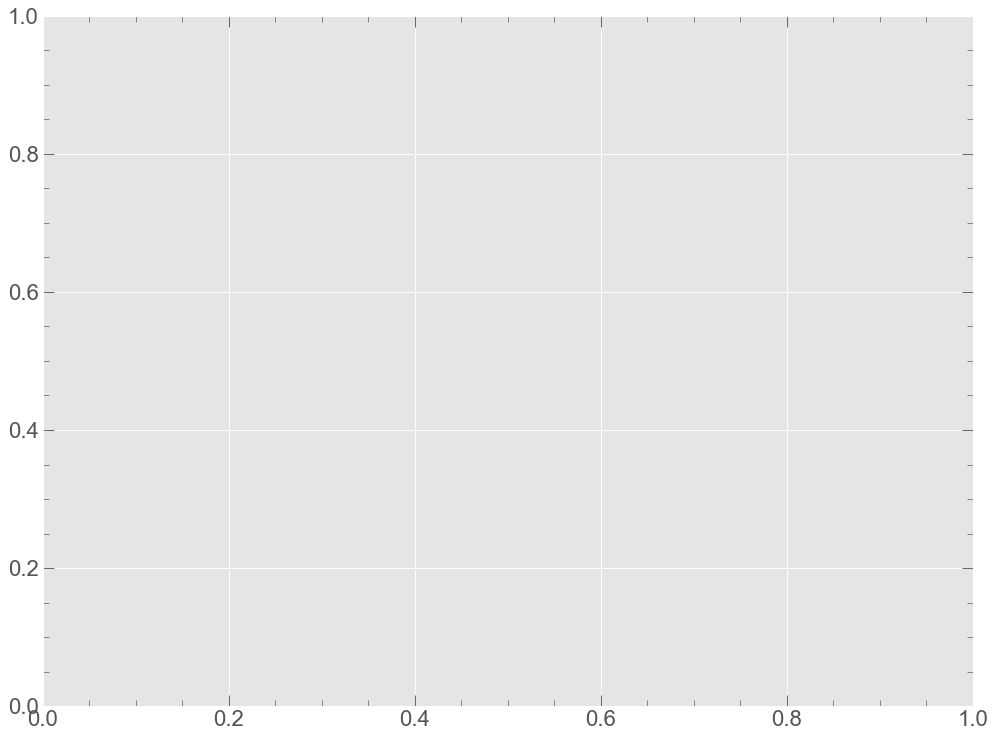

In [8]:
#
all_datas=[ ca_2019]
years=['2019']
cols=['College Rate','Public Transport Rate', 'Personal Transport Rate',
       'Median Age', 'Commute Time Car', 'Uneducated Rate']
c=['r', 'b','g', 'y', 'm','c','k']
for i, data in enumerate(all_datas):
    print(f'Plots for {years[i]}')
    for j in range(1, 7):
        fig = plt.figure(figsize=(15,80))
        ax = fig.add_subplot(6, 1, j)
    
        sns.regplot(x=cols[j-1], y='House Value',
           data=data,color=color[j-1],marker=marker[j-1],
            scatter_kws={'s':200},ax=ax)

        ax.set_title(f'{cols[j-1]}  Vs. House Value of CA for 2019 data')
        fig.savefig(f'figures/HouseValue_vs_{cols[j-1]}.png', 
                   bbox_inches="tight")
        plt.show()
    print('*'*80)

## Relational plots

In [ ]:

cols=['Monthly Owner Cost','Household Income',
  'Monthly Rent','Poverty Rate','Asian Population Rate','White Population Rate',
  'Hispanic Population Rate']
marker=["*","o","d","+","*","d",'+']
color=['r','k','g','b','g','y','b']

for j in range(1, 8):
    fig = plt.figure(figsize=(15,80))
    ax = fig.add_subplot(7, 1, j)
    
    sns.regplot(x=cols[j-1], y='House Value',
           data=ca_2019,color=color[j-1],marker=marker[j-1],
            scatter_kws={'s':200},ax=ax)

    ax.set_xlabel(f'{cols[j-1]}')
    ax.set_ylabel('House Value')
    ax.set_title(f'Reg Plot -{cols[j-1]} Vs. House Value for 2019 data')
    fig.savefig(f'figures/{cols[j-1]}_Vs.HouseValue.png', bbox_inches="tight")
    plt.show()



## Barplots 

In [ ]:

cols=[ 'Household Income','Poverty Rate', 'House Value',
       'Monthly Owner Cost', 'Monthly Rent']

for j in range(1, 6):
    fig = plt.figure(figsize=(15,80))
    ax = fig.add_subplot(5, 1, j)

    sns.barplot(x='County', y=cols[j-1],
        data=ca_2019, alpha=0.9, palette="Set2",label = "2019",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('County')
    ax.set_title(f'Bar Plot-{cols[j-1]} Vs. County of CA 2019 data')
    fig.savefig(f'figures/Barplot_{cols[j-1]}_Vs.County.png', bbox_inches="tight")
    plt.show()
print('*'*80)


## Boxplots

In [ ]:

cols=[ 'Household Income','Poverty Rate', 'House Value',
       'Monthly Owner Cost', 'Monthly Rent']
  
for j in range(1, 6):
    fig = plt.figure(figsize=(15,80))
    ax = fig.add_subplot(5, 1, j)

    sns.boxplot(x='County', y=cols[j-1],
            data=ca_2019,  palette="Set2",ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(f'{cols[j-1]}')
    ax.set_xlabel('County')
    ax.set_title(f'Box Plot-{cols[j-1]} Vs. County of CA for 2019 data')
    fig.savefig(f'figures/Boxplot_{cols[j-1]}_Vs.County.png', bbox_inches="tight")
    plt.show()
print('*'*80)



## Corellation of different columns

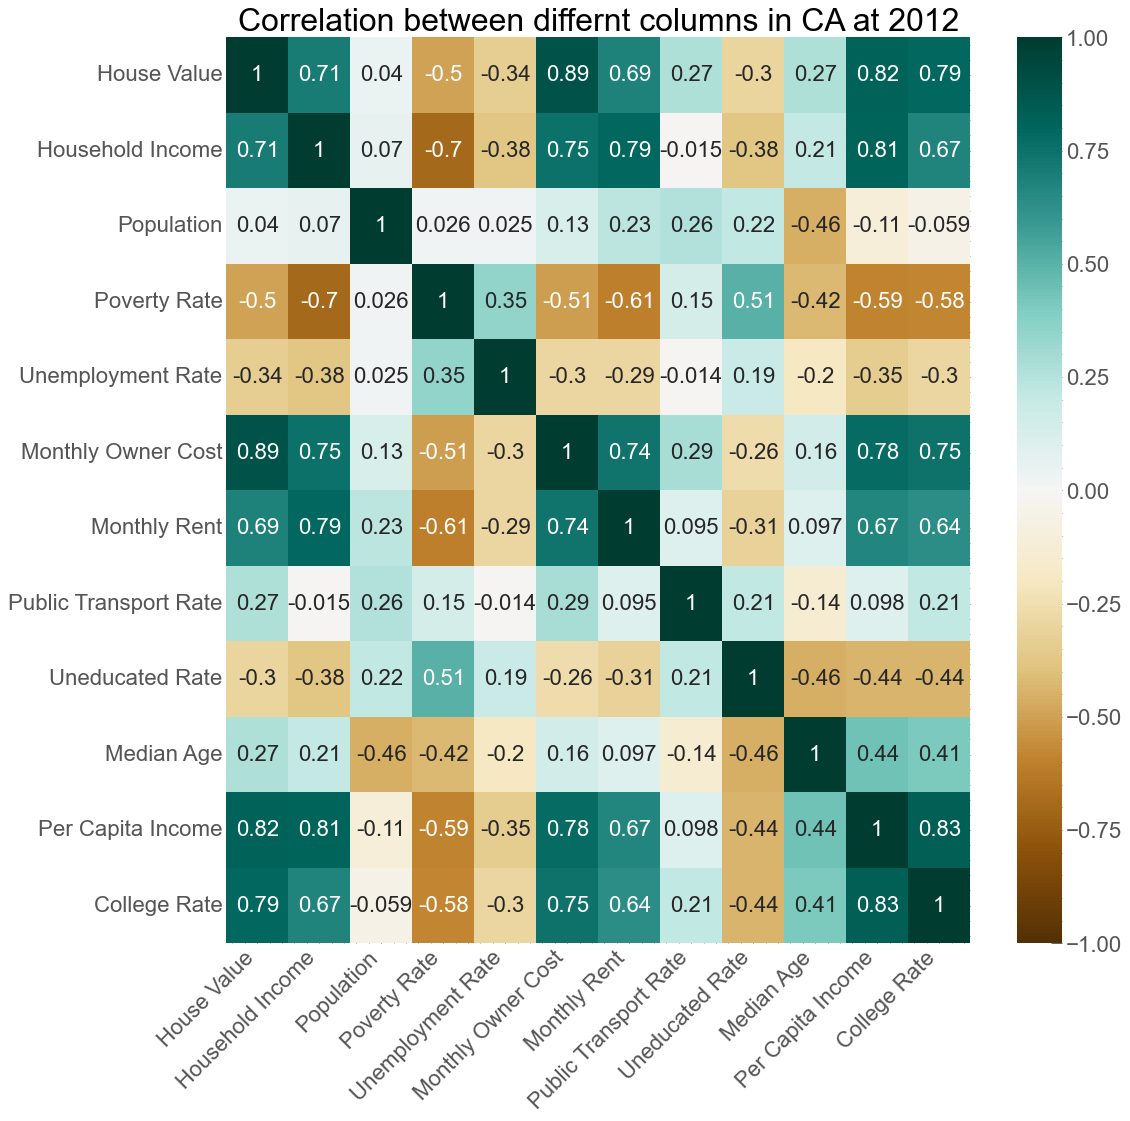

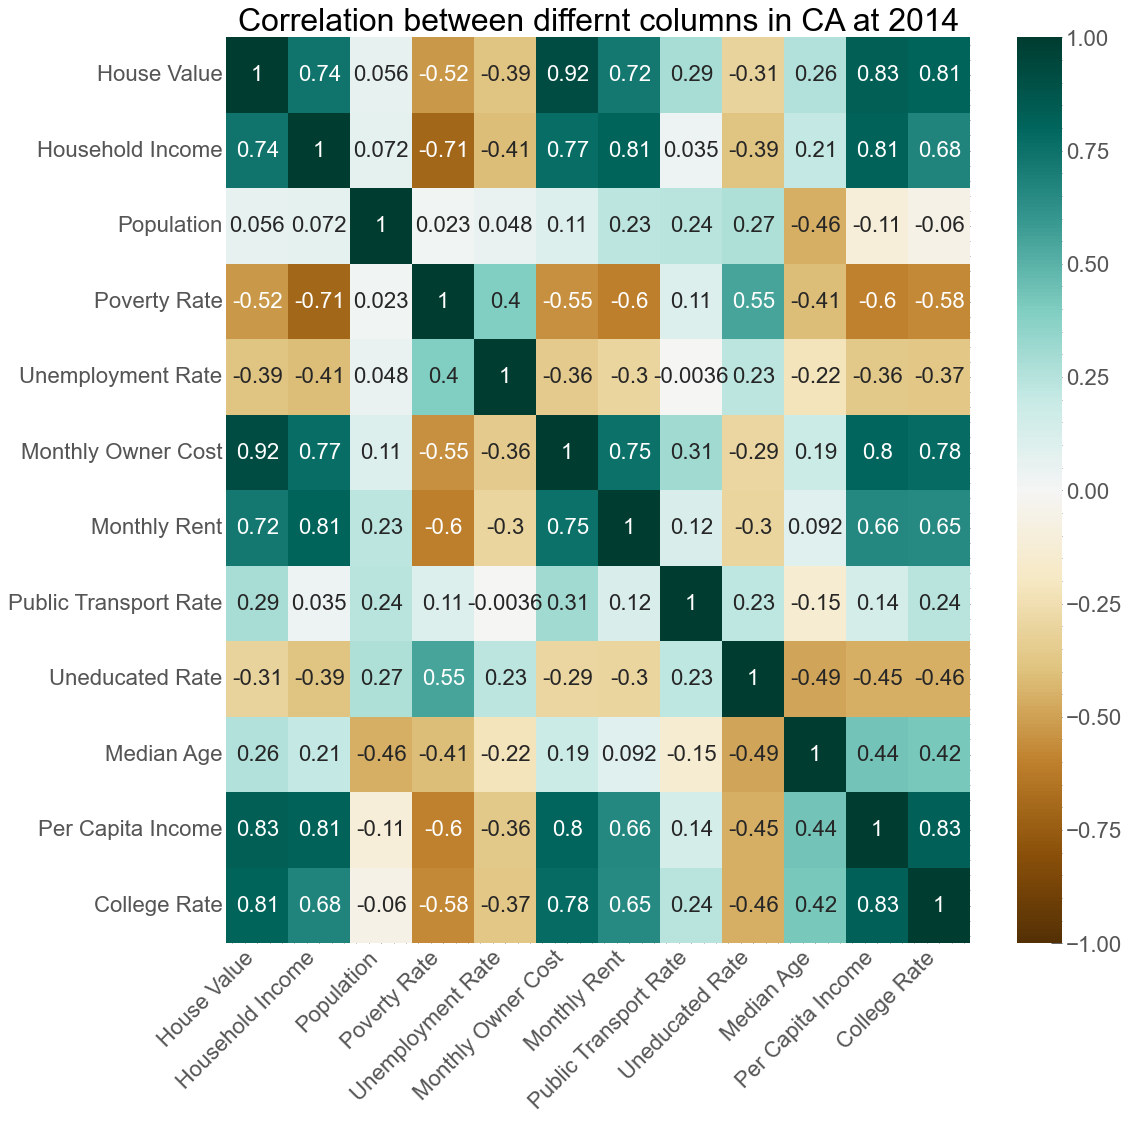

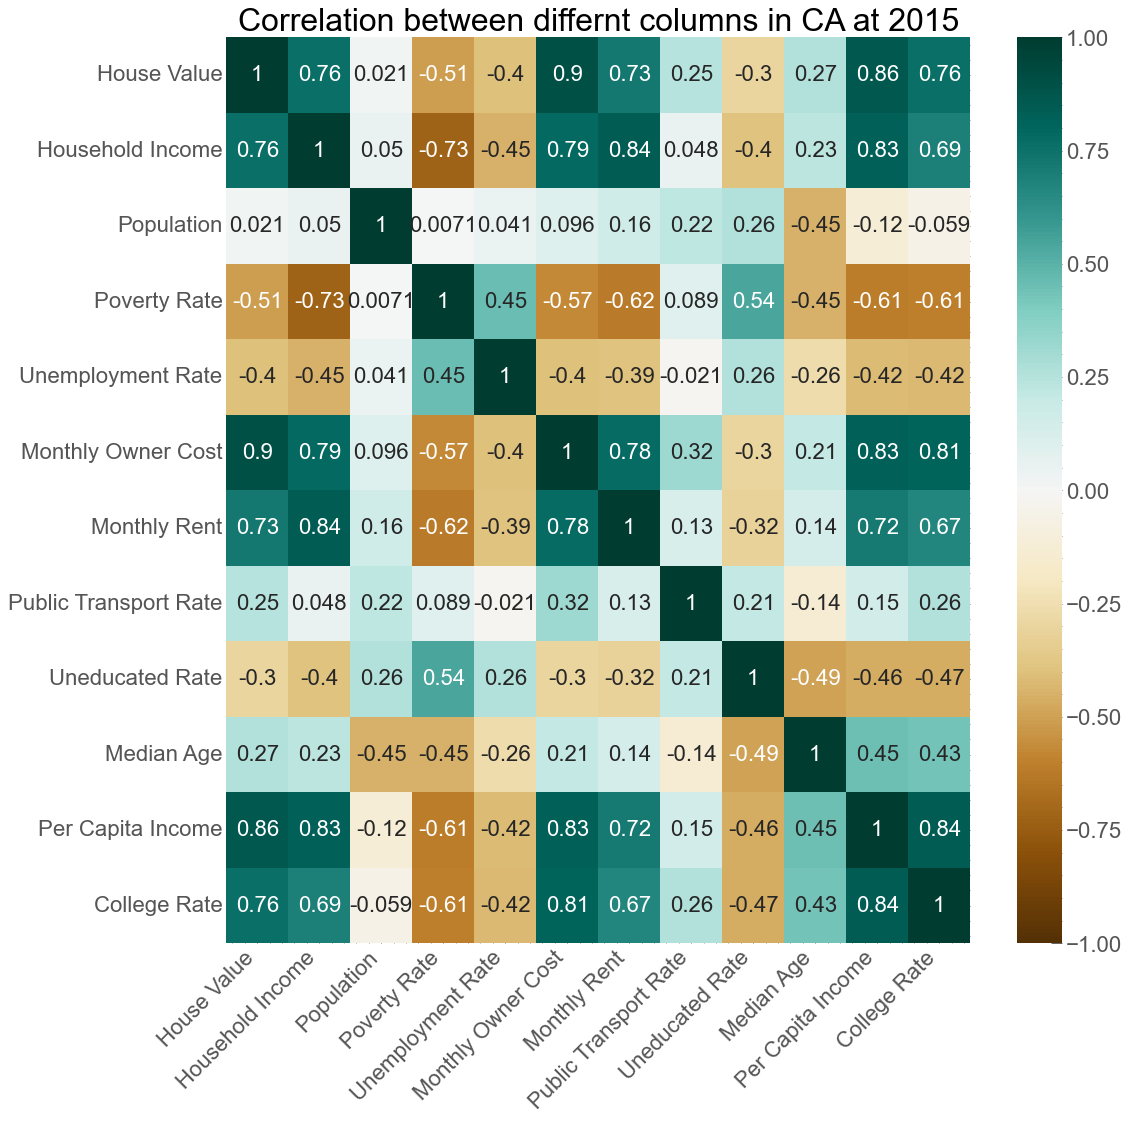

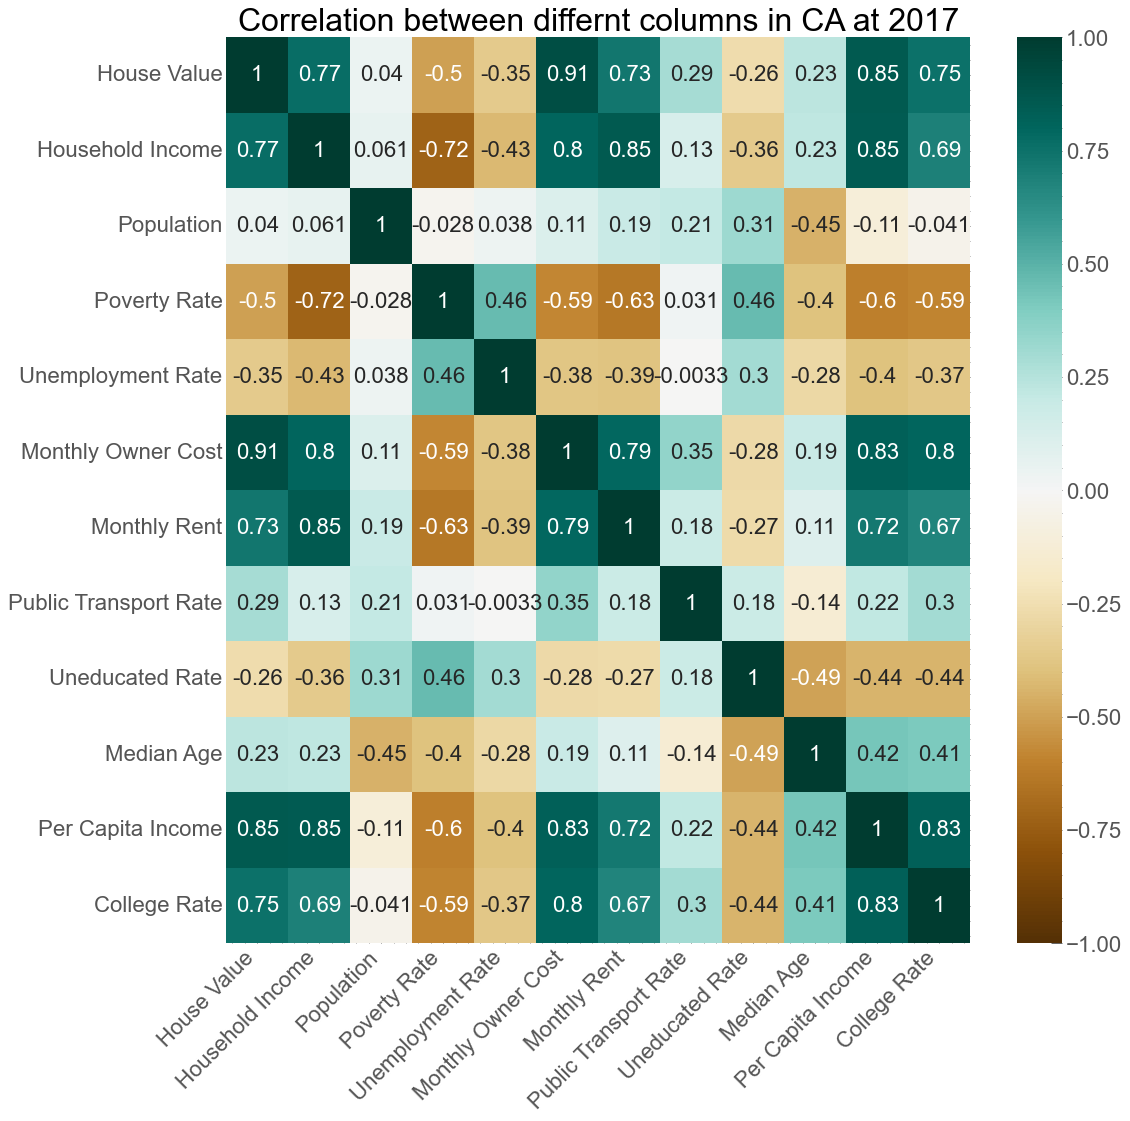

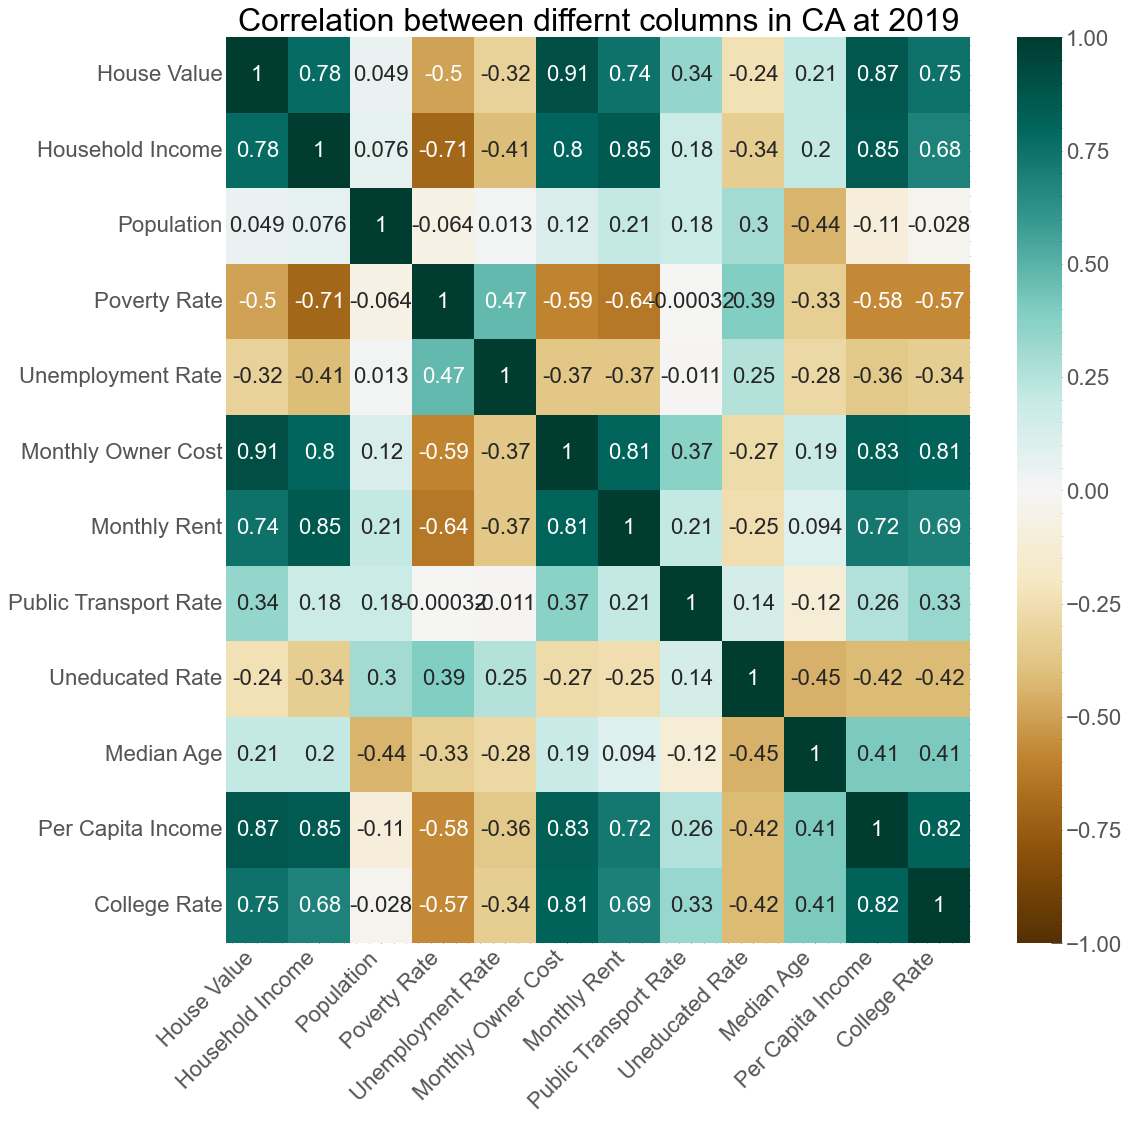

In [10]:
#selecting only important columns
all_corr=[]
all_data=[ca_2012,ca_2014, ca_2015, ca_2017, ca_2019]
year=['2012','2014','2015','2017', '2019']
for i, data in enumerate(all_data):
    ca_data=data[['City', 'House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income',
       'College Rate' ]]
    #plotting all correlation using seaborn heatmap
    corr_1=ca_data.corr()
    all_corr.append(corr_1)
    fig, ax=plt.subplots(figsize=(15,15))
    sns.heatmap(corr_1,vmin=-1, vmax=1, ax=ax, cmap='BrBG',annot=True)
    ax.set_title(f"Correlation between differnt columns in CA at {year[i]}")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       horizontalalignment='right')
    #fig.savefig(f'figures/corrplot_{year[i]}.png', bbox_inches="tight")
    plt.show()

In [11]:
#dataframe of correlation of house value to other columns for different years
corr_df=pd.DataFrame({'2012 House Value':(all_corr[0]['House Value']),
                     '2014 House Value':(all_corr[1]['House Value']),
                     '2015 House Value':(all_corr[2]['House Value']),
                     '2017 House Value':(all_corr[3]['House Value']),
                     '2019 House Value':(all_corr[4]['House Value']),})
#droping house value from rows which is 100 percent corelate
corr_df_house=corr_df.drop(corr_df.index[0])

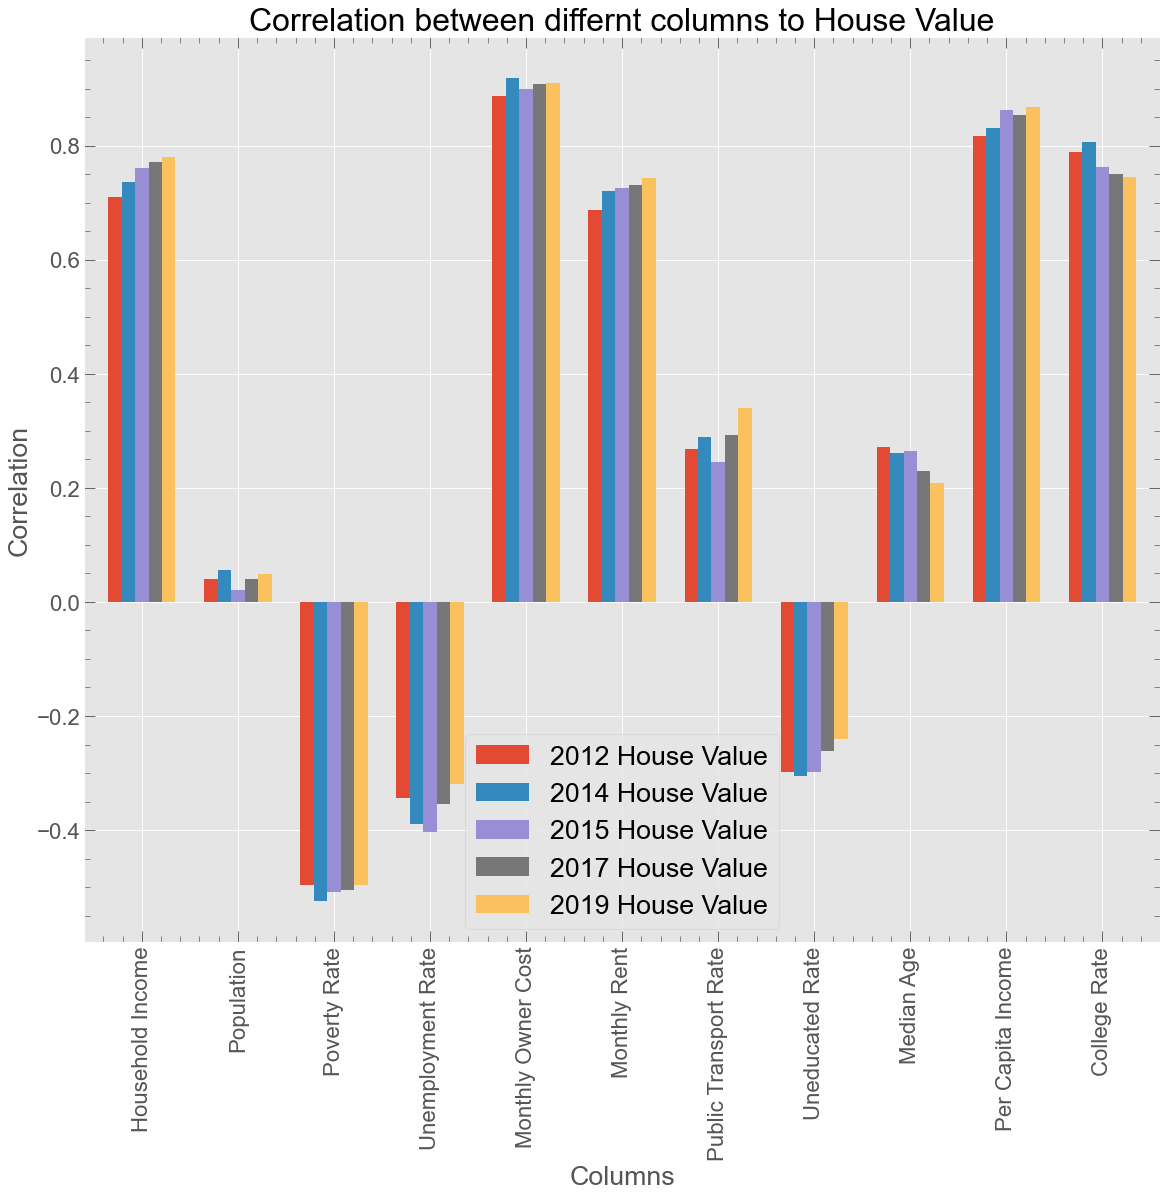

In [12]:
#Bar plot of correlation 
corr_df_house.plot(kind="bar",width=.7,figsize=(15,15))
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.tight_layout()
plt.title("Correlation between differnt columns to House Value")
plt.savefig('figures/final_corr.png', bbox_inches="tight")
plt.show()

## Different years house value

In [13]:
#combined data on from differnt years
df_2012=ca_2012[['Zipcode', 'County','Monthly Owner Cost', 'Monthly Rent', 'House Value']]
df_2014=ca_2014[['Zipcode', 'Monthly Owner Cost', 'Monthly Rent', 'House Value']]
df_2017=ca_2017[['Zipcode', 'Monthly Owner Cost', 'Monthly Rent', 'House Value']]
df_2019=ca_2019[['Zipcode', 'Monthly Owner Cost', 'Monthly Rent', 'House Value']]
df_combined=(df_2012.merge(df_2014, on='Zipcode', suffixes=('_2012', '_2014'))
             .merge(df_2017, on='Zipcode')
             .merge(df_2019, on='Zipcode', suffixes=('_2017', '_2019')))
df_combined=df_combined.drop(['Zipcode'], axis=1)
df_comb=df_combined.groupby('County').mean().reset_index()

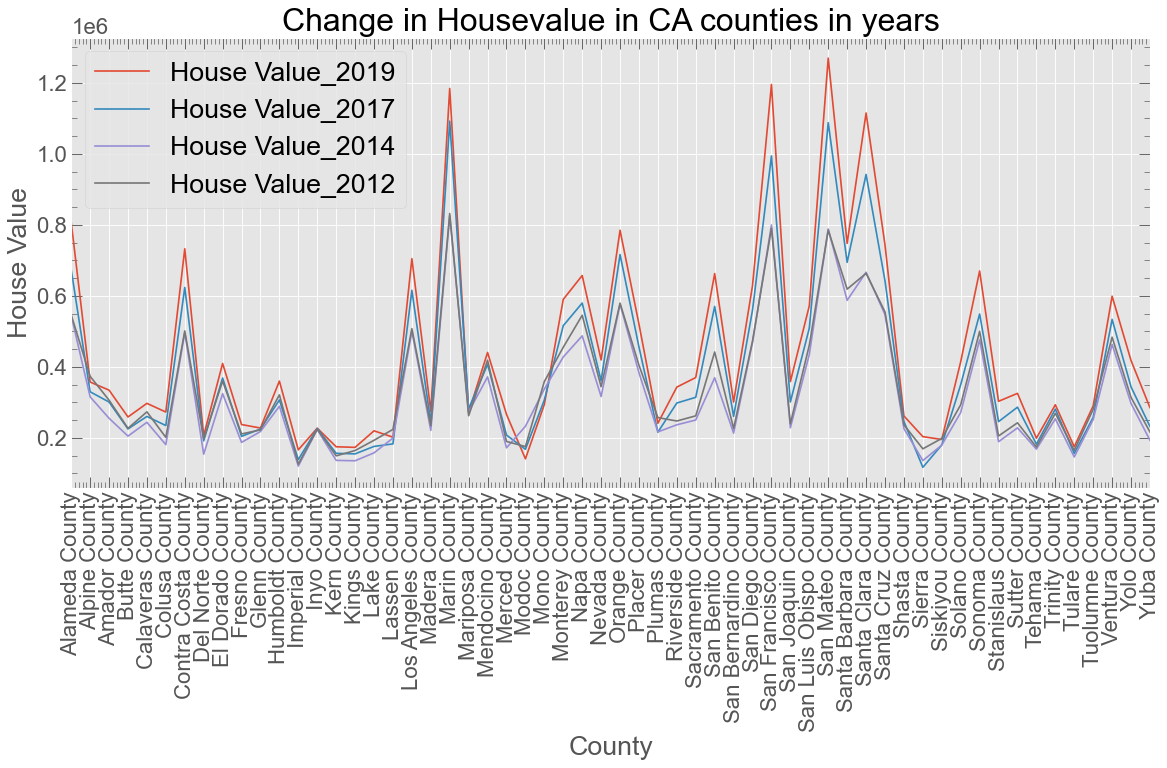

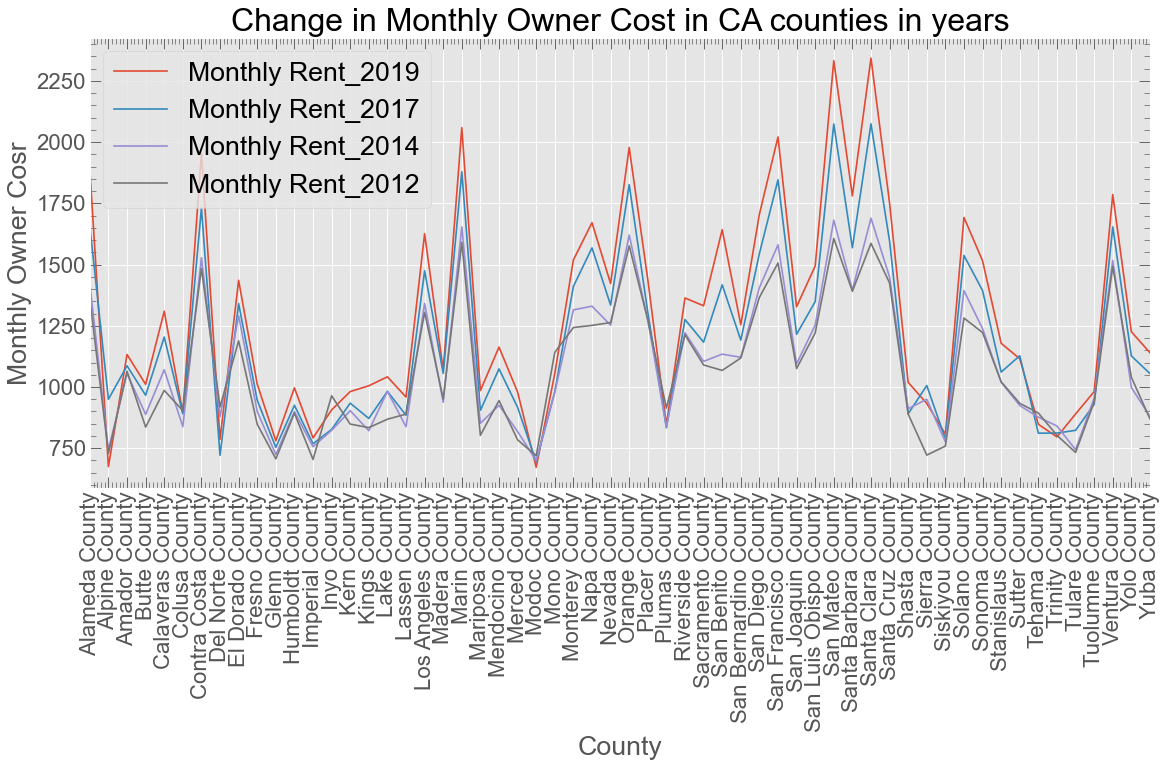

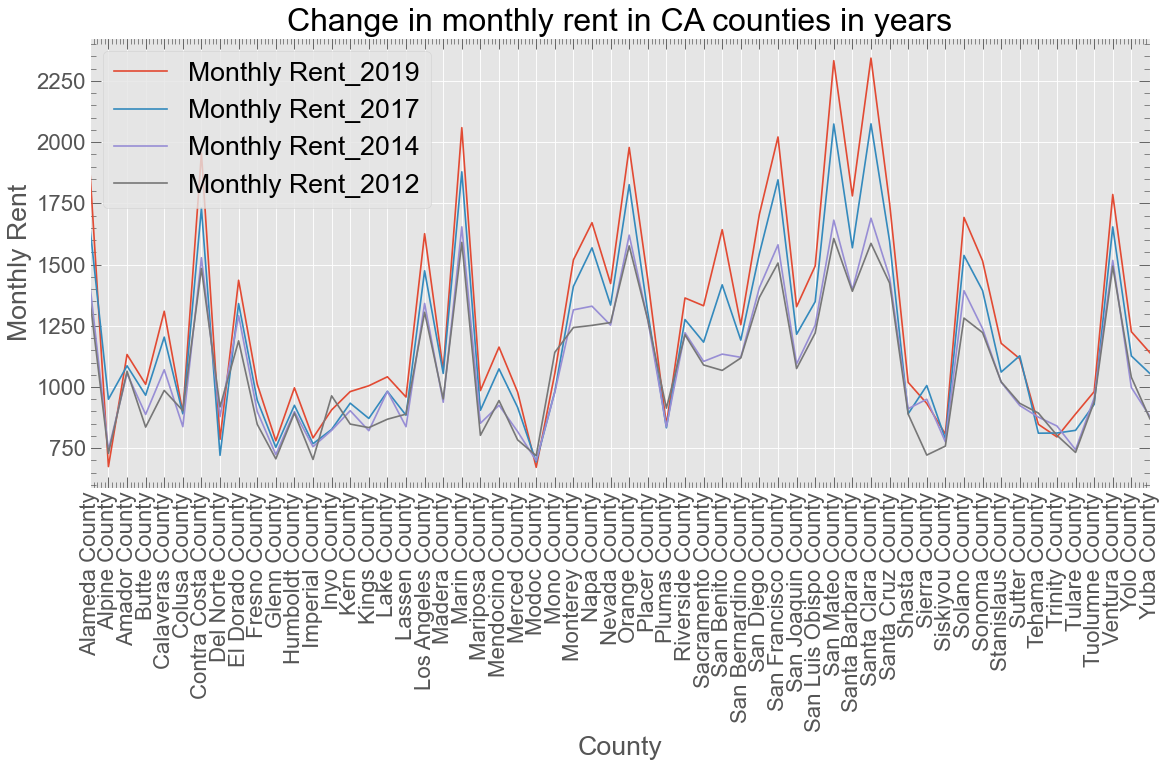

In [14]:
#plotting
counties=df_combined['County'].nunique()
x_values=np.arange(0,counties)
df_comb=df_comb.set_index('County')
county_house_value=df_comb[["House Value_2019","House Value_2017",
                            "House Value_2014","House Value_2012"]]
county_monthly_cost=df_comb[["Monthly Owner Cost_2019","Monthly Owner Cost_2017",
                                             "Monthly Owner Cost_2014",
                                             "Monthly Owner Cost_2012"]]
county_monthly_cost=df_comb[["Monthly Rent_2019","Monthly Rent_2017",
                                             "Monthly Rent_2014",
                                             "Monthly Rent_2012"]]
cols=['House Value', "Monthly Owner Cosr", 'Monthly Rent']
title=['Change in Housevalue in CA counties in years',
       'Change in Monthly Owner Cost in CA counties in years',
       'Change in monthly rent in CA counties in years']
county_all=[county_house_value,county_monthly_cost,county_monthly_cost] 

for i, county in enumerate(county_all):
    county.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,10))
    plt.xlim(0,57)
    plt.xlabel("County")
    plt.ylabel(f"{cols[i]}")
    plt.title(f'{title[i]}')
    plt.tight_layout()
    plt.savefig(f'figures/{cols[i]}_vs,County.png', bbox_inches="tight")
    plt.show()

## Seaborn distplots

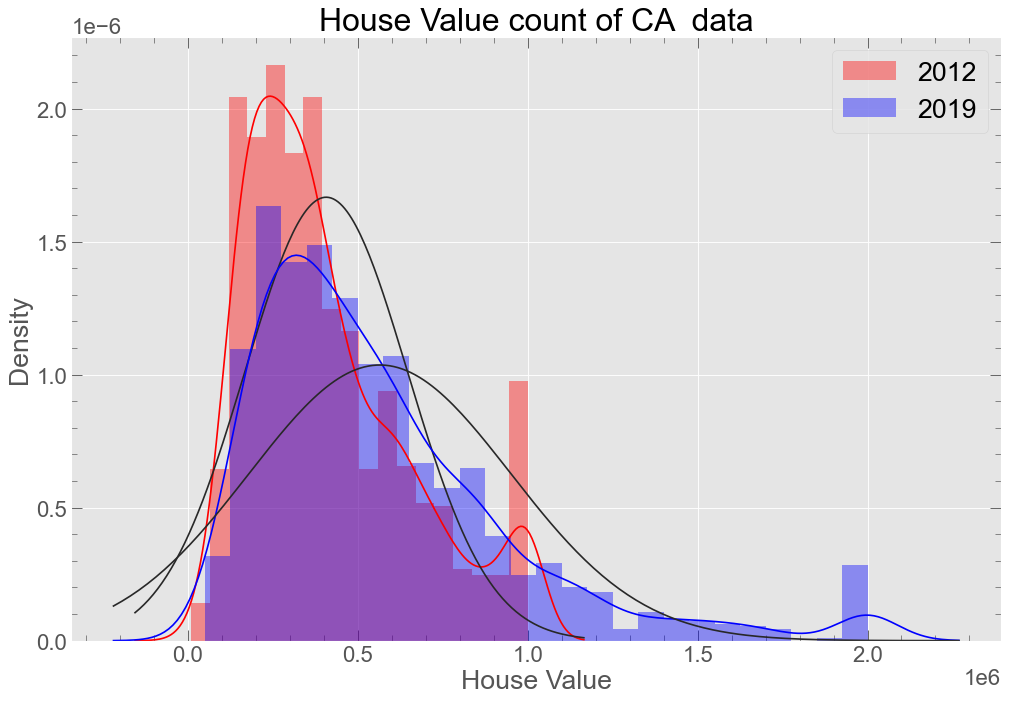

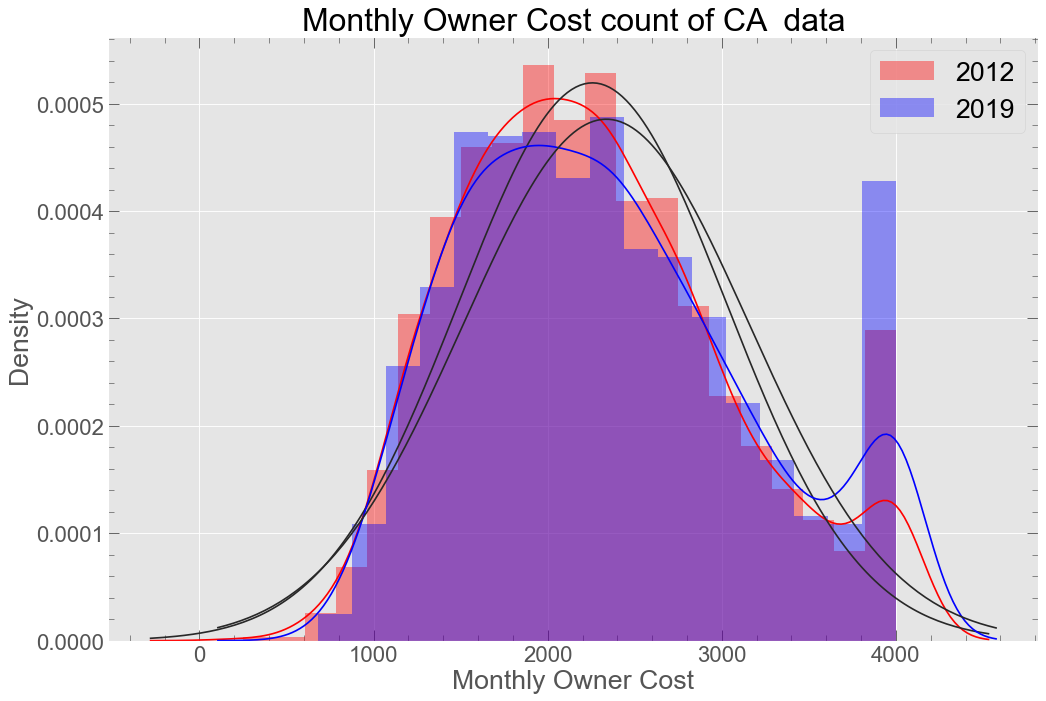

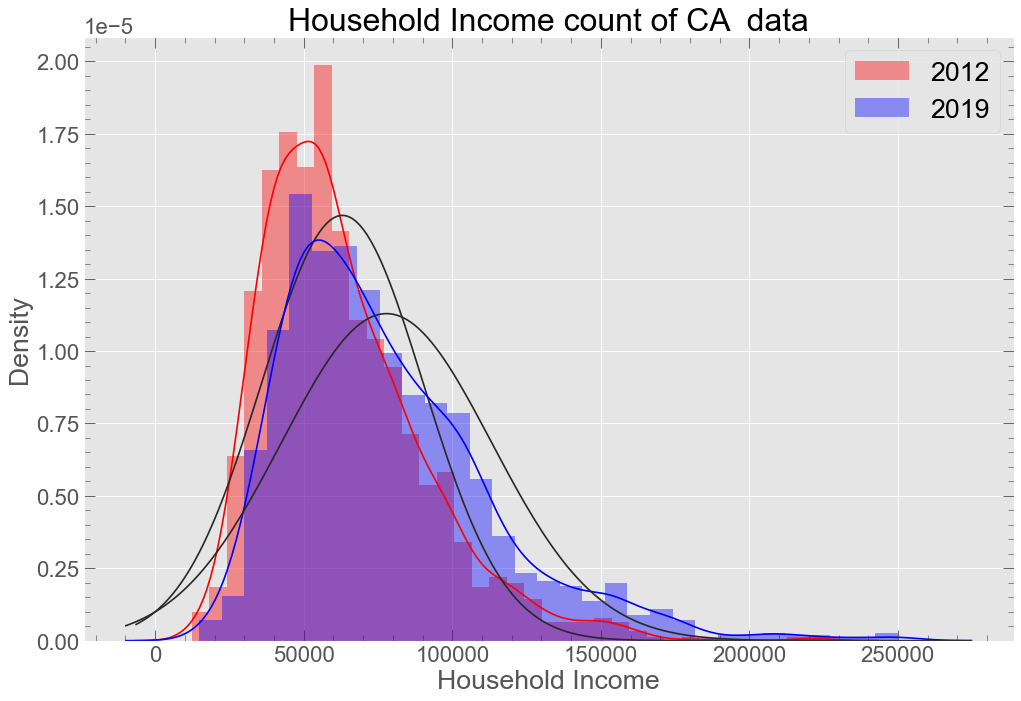

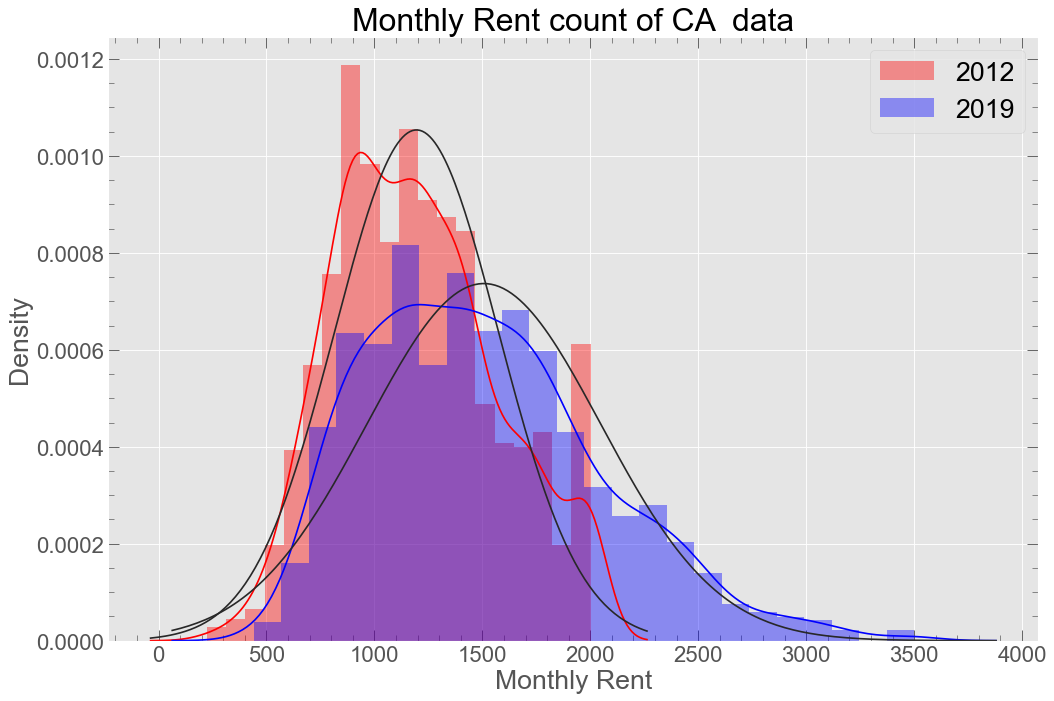

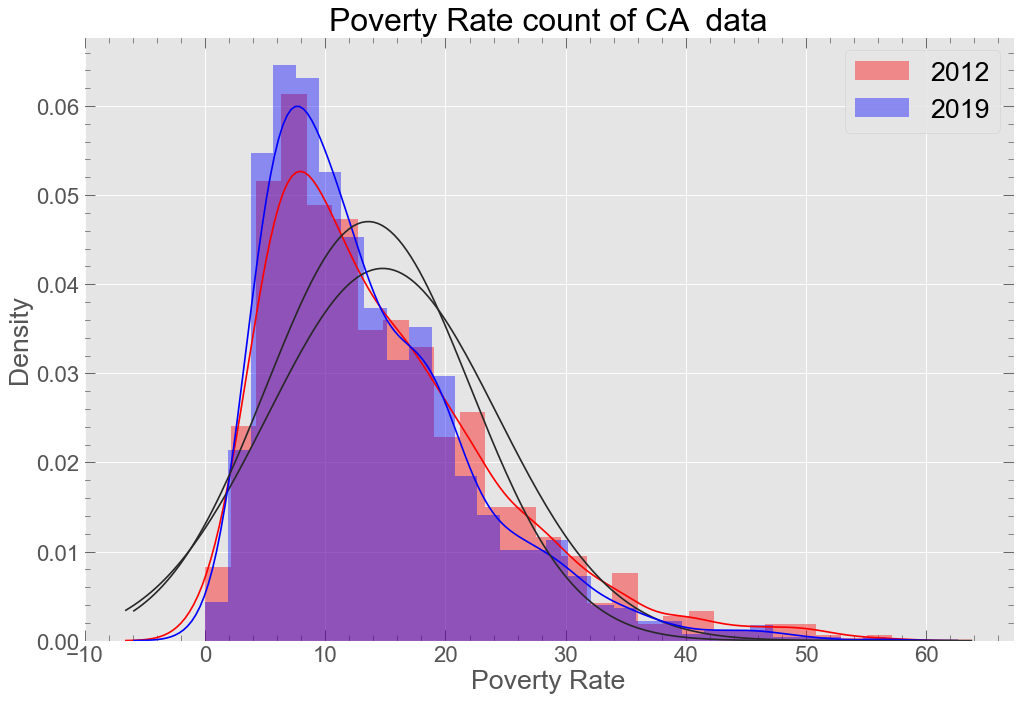

In [15]:
cols=['House Value','Monthly Owner Cost','Household Income',
  'Monthly Rent','Poverty Rate']

for i, c in enumerate(cols):
    fig,ax=plt.subplots()
    sns.distplot(ca_2012[c],color='r',kde=True, fit=stats.norm,label='2012',ax=ax)
    sns.distplot(ca_2019[c],color='b', kde=True,  fit=stats.norm,label='2019',ax=ax)
    ax.legend()
    ax.set_title(f'{c} count of CA  data')
    fig.savefig(f'figures/distplot_{cols[i]}.png', bbox_inches="tight")
    plt.show()

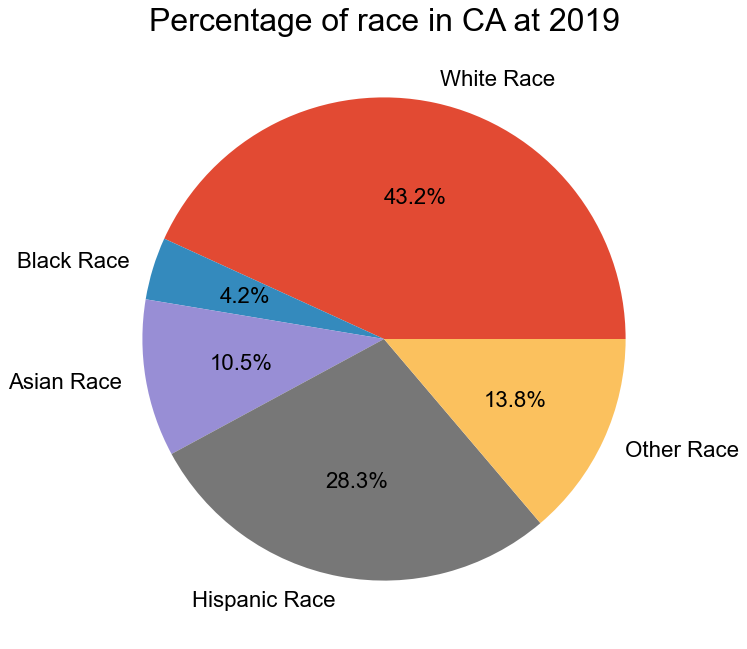

In [16]:
#Percentage of educated and uneducated population in CA

all_datas=[ca_2019]
years=['2019']
for i, data in enumerate(all_datas):
    ca_total_population=data['Population'].sum()
    ca_white=((data['Population']*data['White Population Rate'])/100).sum(axis=0)
    ca_black=((data['Population']*data['Black Population Rate'])/100).sum(axis=0)
    ca_asian=((data['Population']*data['Asian Population Rate'])/100).sum(axis=0)
    ca_hispanic=((data['Population']*data['Hispanic Population Rate'])/100).sum(axis=0)
    ca_other=(-ca_total_population+(ca_white+ca_black+ca_asian+ca_hispanic))
    #plt.figure(figsize=(5,5))
    slices=[ca_white, ca_black, ca_asian, ca_hispanic, ca_other]
    labels=["White Race","Black Race", 
            'Asian Race','Hispanic Race','Other Race']
    plt.pie(slices,labels=labels,autopct="%1.1f%%")
    plt.title(f"Percentage of race in CA at {years[i]}")
    fig.savefig(f'figures/pieplot.png', bbox_inches="tight")
    plt.show()

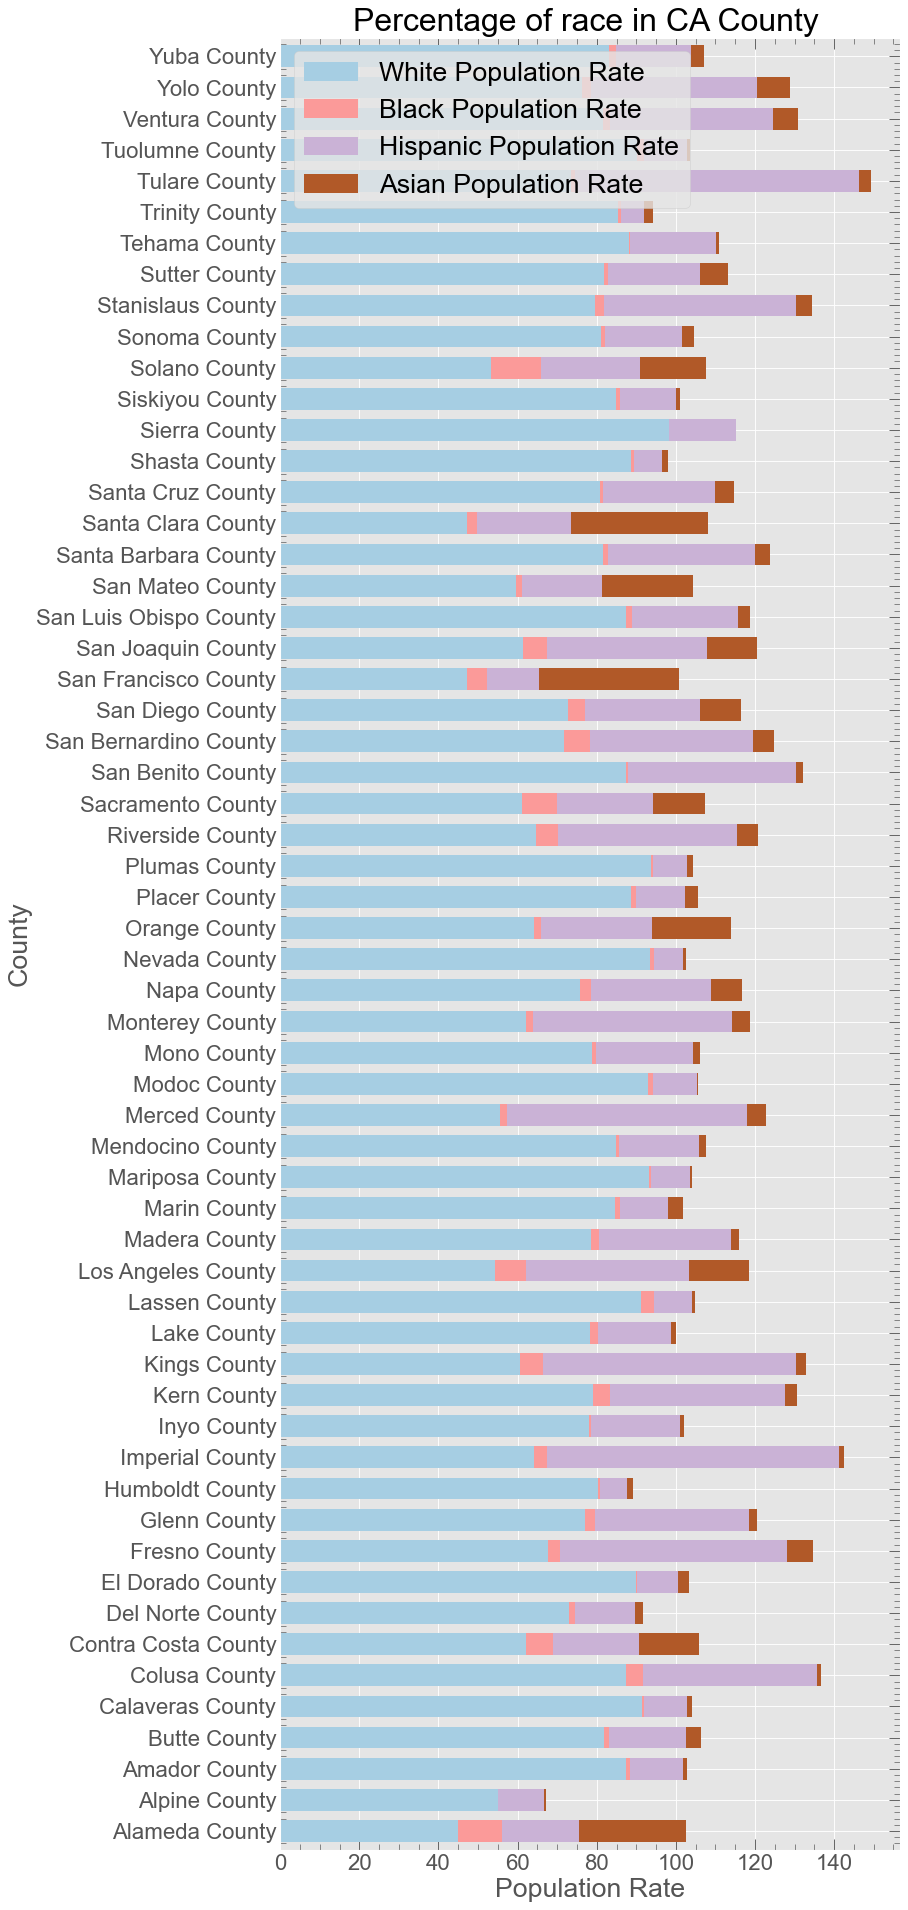

In [17]:
#to look race with county

r_2019=ca_2019[["County",'White Population Rate',
               'Black Population Rate',
               'Hispanic Population Rate',
               'Asian Population Rate']]
r_2019=r_2019.groupby('County').mean()


#plotting bar chart

fig,ax=plt.subplots(figsize=(10,30))
r_2019.plot(kind="barh",width=.7, stacked=True,colormap='Paired',ax=ax)
ax.set_xlabel("Population Rate")
ax.set_ylabel("County")
ax.set_title(f"Percentage of race in CA County ")
fig.savefig(f'figures/race_barplot.png', bbox_inches="tight")
plt.show()

## Oneway t-test

In [21]:
p_values=[]
col=['House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income',
       'College Rate']
all_data=[ca_2012,ca_2014, ca_2015, ca_2017, ca_2019]
year=['2012','2014', '2015', '2017', '2019']
for i, data in enumerate(all_data):
    for c in col:
        mean=ca_2019[c].mean()
        sample=ca_2019.sample(500)
        t=sts.ttest_1samp(sample[c],mean)
        pvalue=t[1]
        p_values.append(pvalue)

In [22]:
#creating dataframe for t test for each year
p_df=pd.DataFrame({'p_values_2012':p_values[:12],
                   'p_values_2014':p_values[12:24],
                  'p_values_2015':p_values[24:36],
                  'p_values_2017':p_values[36:48],
                  'p_values_2019':p_values[48:]}, index=col)
p_df

p_values_2012  p_values_2014  p_values_2015  \
House Value                 0.392813       0.870274       0.165029   
Household Income            0.693258       0.153559       0.139971   
Population                  0.964172       0.717661       0.241405   
Poverty Rate                0.680065       0.632942       0.817053   
Unemployment Rate           0.183013       0.898068       0.548293   
Monthly Owner Cost          0.199780       0.467094       0.959900   
Monthly Rent                0.596005       0.329663       0.690328   
Public Transport Rate       0.361317       0.886938       0.961240   
Uneducated Rate             0.840325       0.863241       0.367979   
Median Age                  0.730343       0.672967       0.507471   
Per Capita Income           0.880772       0.720598       0.068542   
College Rate                0.728555       0.738235       0.981518   

                       p_values_2017  p_values_2019  
House Value                 0.955247       0.206912  
Household Income            0.874802       0.477035  
Population                  0.665054       0.475251  
Poverty Rate                0.756161       0.126322  
Unemployment Rate           0.358291       0.480458  
Monthly Owner Cost          0.528415       0.823637  
Monthly Rent                0.769404       0.826664  
Public Transport Rate       0.741500       0.580091  
Uneducated Rate             0.462575       0.964159  
Median Age                  0.725789       0.207703  
Per Capita Income           0.952206       0.647922  
College Rate                0.598613       0.285092

# Top 5 Best Cities for Differnt Years

In [45]:
#getting best city for each year and appending to cities
cities=[]
all_data=[ca_2012,ca_2014, ca_2015, ca_2017, ca_2019]
for data in all_data:
    
    #selecting only important columns
    d1=data[['City', 'House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income',
       'College Rate' ]]
    #using groupby method to groupby the data according to city
    d1=d1.groupby('City').agg({'House Value': 'mean',
                                  'Household Income': 'mean',
                                  'Population': 'sum',
                                   'Poverty Rate': 'mean', 
                                  'Unemployment Rate': 'mean',
                                  'Monthly Owner Cost': 'mean', 
                                  'Monthly Rent': 'mean',
                                   'Public Transport Rate': 'mean', 
                                  'Per Capita Income': 'mean'}).reset_index()
    d2=d1.nlargest(50,"Population")
    #getting nlargest and nsmallest of all columns and selecting their city as a list
    hv=d2.nsmallest(100, 'House Value')
    hv_c=hv['City'].tolist()
    ue=d2.nsmallest(25, 'Unemployment Rate')
    ue_c=ue['City'].tolist()
    pt=d2.nlargest(25, 'Public Transport Rate')
    pt_c=pt['City'].tolist()
    p=d2.nsmallest(25, 'Poverty Rate')
    p_c=p['City'].tolist()
    mr=d2.nsmallest(25, 'Monthly Rent')
    mr_c=mr['City'].tolist()
    moc=d2.nsmallest(25, 'Monthly Owner Cost')
    moc_c=moc['City'].tolist()
    pci=d2.nlargest(25, 'Per Capita Income')
    pci_c=pci['City'].tolist()
    hi=d2.nlargest(25, 'Household Income')
    hi_c=hi['City'].tolist()
    
    #Ading largest or smallest city from all columns

    all_city=hv_c + ue_c + pt_c + p_c +mr_c + moc_c +hi_c+pci_c

    #Using counter to count most common
    my_counter=Counter(all_city)
    best_city=my_counter.most_common(5)
    cities.append(best_city)
    
print(cities)

[[('Elk Grove', 6), ('Santa Rosa', 6), ('Whittier', 6), ('San Diego', 6), ('Fullerton', 6)], [('Whittier', 7), ('Elk Grove', 6), ('Salinas', 6), ('Santa Rosa', 6), ('Anaheim', 6)], [('Salinas', 7), ('Whittier', 7), ('Santa Rosa', 7), ('Anaheim', 6), ('San Diego', 6)], [('Roseville', 7), ('Salinas', 6), ('Whittier', 6), ('Santa Rosa', 6), ('San Diego', 6)], [('Elk Grove', 7), ('Roseville', 6), ('Whittier', 6), ('Santa Rosa', 6), ('Hayward', 6)]]


In [46]:
#creating a dataframe for best cities
df_best=pd.DataFrame({'city_2012':cities[0],
                     'city_2014':cities[1],
                     'city_2015':cities[2],
                     'city_2017':cities[3],
                    'city_2019':cities[4]})
df_best

city_2012        city_2014        city_2015        city_2017  \
0   (Elk Grove, 6)    (Whittier, 7)     (Salinas, 7)   (Roseville, 7)   
1  (Santa Rosa, 6)   (Elk Grove, 6)    (Whittier, 7)     (Salinas, 6)   
2    (Whittier, 6)     (Salinas, 6)  (Santa Rosa, 7)    (Whittier, 6)   
3   (San Diego, 6)  (Santa Rosa, 6)     (Anaheim, 6)  (Santa Rosa, 6)   
4   (Fullerton, 6)     (Anaheim, 6)   (San Diego, 6)   (San Diego, 6)   

         city_2019  
0   (Elk Grove, 7)  
1   (Roseville, 6)  
2    (Whittier, 6)  
3  (Santa Rosa, 6)  
4     (Hayward, 6)

In [47]:
#getting dataframe for best city
best_cities=[]
all_df=[]
city_value=[]
year=['2012','2014', '2015', '2017', '2019']
for i, data in enumerate(all_data):
    d3=data[(data['City']==cities[i][0][0])|
            (data['City']==cities[i][1][0])|
            (data['City']==cities[i][2][0])|
            (data['City']==cities[i][3][0])|
            (data['City']==cities[i][4][0])]
    d_city=d3[['City', 'House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate',  
        'Per Capita Income']]
    d_city=d_city.groupby('City').mean().reset_index()
    d_city[['House Value','Household Income','Monthly Owner Cost', 'Monthly Rent',
       'Per Capita Income']]=d_city[['House Value','Household Income','Monthly Owner Cost', 'Monthly Rent',
       'Per Capita Income']].applymap('${:.2f}'.format)
    d_city[['Poverty Rate', 'Unemployment Rate',
       'Public Transport Rate','Population']]=d_city[['Poverty Rate', 'Unemployment Rate',
       'Public Transport Rate',  'Population']].applymap('{:.2f}'.format)
    city_value.append(d_city)
    d3=d3.drop_duplicates(subset=['City'],keep='last')
    all_df.append(d3)
    # Convert best city to list
    best_city=(cities[i][0][0], cities[i][1][0], cities[i][2][0],cities[i][3][0],cities[i][4][0])
    best_city=list(best_city)
    print(f'Best cities for {year[i]} are:{best_city}')
    best_cities.append(best_city)
    

Best cities for 2012 are:['Elk Grove', 'Santa Rosa', 'Whittier', 'San Diego', 'Fullerton']
Best cities for 2014 are:['Whittier', 'Elk Grove', 'Salinas', 'Santa Rosa', 'Anaheim']
Best cities for 2015 are:['Salinas', 'Whittier', 'Santa Rosa', 'Anaheim', 'San Diego']
Best cities for 2017 are:['Roseville', 'Salinas', 'Whittier', 'Santa Rosa', 'San Diego']
Best cities for 2019 are:['Elk Grove', 'Roseville', 'Whittier', 'Santa Rosa', 'Hayward']


In [48]:
#creating a dataframe for best cities
df_best=pd.DataFrame({'city_2012':best_cities[0],
                     'city_2014':best_cities[1],
                     'city_2015':best_cities[2],
                     'city_2017':best_cities[3],
                    'city_2019':best_cities[4]})
df_best

city_2012   city_2014   city_2015   city_2017   city_2019
0   Elk Grove    Whittier     Salinas   Roseville   Elk Grove
1  Santa Rosa   Elk Grove    Whittier     Salinas   Roseville
2    Whittier     Salinas  Santa Rosa    Whittier    Whittier
3   San Diego  Santa Rosa     Anaheim  Santa Rosa  Santa Rosa
4   Fullerton     Anaheim   San Diego   San Diego     Hayward

In [49]:
#value of best cities
print('Best cities for 2012')
best_cities_values_2012=city_value[0]
best_cities_values_2012



Best cities for 2012


City House Value Household Income Population Poverty Rate  \
0   Elk Grove  $279466.67        $80070.67   54022.00         9.33   
1   Fullerton  $499800.00        $70993.50   33762.75        13.97   
2   San Diego  $495364.55        $74893.61   40339.19        13.57   
3  Santa Rosa  $393500.00        $61567.50   34718.83        12.61   
4    Whittier  $400783.33        $67164.67   32110.83        10.53   

  Unemployment Rate Monthly Owner Cost Monthly Rent Public Transport Rate  \
0              4.89           $2262.00     $1480.33                  2.74   
1              5.35           $2654.25     $1356.75                  3.17   
2              4.43           $2524.97     $1415.74                  3.51   
3              5.62           $2302.17     $1236.50                  1.63   
4              4.77           $2283.00     $1251.33                  2.83   

  Per Capita Income  
0         $28459.33  
1         $31859.50  
2         $35708.42  
3         $31017.00  
4         $25393.17

In [50]:
#value of best cities
print('Best cities for 2014')
best_cities_values_2014=city_value[1]

best_cities_values_2014

Best cities for 2014


City House Value Household Income Population Poverty Rate  \
0     Anaheim  $437128.57        $67765.14   51501.43        14.75   
1   Elk Grove  $274266.67        $79339.33   56622.67        10.30   
2     Salinas  $353720.00        $65856.80   37003.20        15.12   
3  Santa Rosa  $386316.67        $62346.00   35288.67        12.40   
4    Whittier  $389600.00        $66982.17   32652.67        12.18   

  Unemployment Rate Monthly Owner Cost Monthly Rent Public Transport Rate  \
0              5.33           $2313.57     $1501.14                  4.00   
1              5.22           $2059.67     $1505.00                  2.39   
2              4.07           $2218.80     $1285.60                  0.33   
3              5.35           $2114.50     $1305.17                  1.84   
4              4.51           $2164.67     $1292.67                  2.88   

  Per Capita Income  
0         $27730.57  
1         $28767.33  
2         $27544.20  
3         $31530.67  
4         $25072.00

In [51]:
#value of best cities
print('Best cities for 2015')
best_cities_values_2015=city_value[2]
best_cities_values_2015

Best cities for 2015


City House Value Household Income Population Poverty Rate  \
0     Anaheim  $448871.43        $69156.57   51815.57        14.33   
1     Salinas  $368560.00        $66219.80   37178.80        15.11   
2   San Diego  $514990.32        $77168.97   41978.42        13.51   
3  Santa Rosa  $406250.00        $62501.50   35692.00        11.81   
4    Whittier  $404200.00        $67329.50   32860.33        11.69   

  Unemployment Rate Monthly Owner Cost Monthly Rent Public Transport Rate  \
0              4.48           $2261.71     $1531.14                  3.61   
1              3.69           $2129.60     $1277.80                  0.38   
2              4.02           $2404.42     $1491.35                  3.58   
3              4.35           $2039.00     $1330.17                  1.77   
4              3.89           $2135.67     $1308.83                  2.67   

  Per Capita Income  
0         $28000.57  
1         $27775.80  
2         $37070.52  
3         $32142.33  
4         $25439.50

In [52]:
#value of best cities
print('Best cities for 2017')
best_cities_values_2017=city_value[3]
best_cities_values_2017

Best cities for 2017


City House Value Household Income Population Poverty Rate  \
0   Roseville  $384433.33        $81281.67   45833.67         9.13   
1     Salinas  $438320.00        $73108.40   37600.00        13.16   
2   San Diego  $581493.55        $80058.26   42958.61        12.86   
3  Santa Rosa  $472766.67        $68532.00   36124.83        11.04   
4    Whittier  $461333.33        $69004.00   32831.67        11.37   

  Unemployment Rate Monthly Owner Cost Monthly Rent Public Transport Rate  \
0              2.88           $2097.00     $1451.33                  1.33   
1              2.73           $2181.00     $1470.60                  0.56   
2              3.41           $2472.65     $1617.52                  3.57   
3              3.24           $2173.50     $1465.50                  1.70   
4              2.87           $2184.00     $1399.67                  2.00   

  Per Capita Income  
0         $37908.33  
1         $30730.00  
2         $39984.94  
3         $35187.50  
4         $26444.83

In [53]:
#value of best cities
print('Best cities for 2019')
best_cities_values_2019=city_value[4]
best_cities_values_2019

Best cities for 2019


City House Value Household Income Population Poverty Rate  \
0   Elk Grove  $408500.00        $94567.00   60828.67         8.38   
1     Hayward  $625400.00        $93908.00   48274.50         8.74   
2   Roseville  $435566.67        $88502.33   46766.33         8.75   
3  Santa Rosa  $557116.67        $77016.50   35787.67         9.92   
4    Whittier  $525600.00        $77285.00   32551.33         9.17   

  Unemployment Rate Monthly Owner Cost Monthly Rent Public Transport Rate  \
0              2.71           $2214.67     $1715.67                  2.41   
1              2.57           $2647.75     $1893.00                  9.20   
2              2.30           $2252.67     $1609.33                  1.32   
3              2.50           $2369.83     $1628.83                  1.53   
4              2.27           $2334.67     $1507.67                  1.51   

  Per Capita Income  
0         $35344.33  
1         $36152.00  
2         $41669.33  
3         $39365.83  
4         $28878.67

## Plotting using gmaps

## Best cities of 2012

In [54]:

#Using the template add the best city marks to the heatmap
info_box_template = """
<dl>
<dt>City:</dt><dd>{City}</dd>
<dt>House Value:</dt><dd>{House Value}</dd>
<dt>Household Income:</dt><dd>{Household Income}</dd>
<dt>Population:</dt><dd>{Population}</dd>
<dt>Unemployment Rate:</dt><dd>{Unemployment Rate}</dd>
<dt>Poverty Rate:</dt><dd>{Poverty Rate}</dd>
<dt>Monthly Owner Cost:</dt><dd>{Monthly Owner Cost}</dd>
<dt>Monthly Rent:</dt><dd>{Monthly Rent}</dd>
<dt>Public Transport Rate:</dt><dd>{Public Transport Rate}</dd>
<dt>Per Capita Income:</dt><dd>{Per Capita Income}</dd>
</dl>

"""


In [55]:
#2012
d_2012=all_df[0]
marker_locations = d_2012[['Lat', 'Lng']]
best_cities_values_2012=city_value[0]

# Create a marker_layer using the best city list to fill the info box
layout={
        'width': '1000px',
        'height': '800px',
        'padding': '3px',
        'border': '1px solid black'
}
fig = gmaps.figure(layout=layout, map_type="HYBRID")
markers = gmaps.marker_layer(marker_locations,
            info_box_content=[info_box_template.format(**row) for index, row in best_cities_values_2012.iterrows()])
fig.add_layer(markers)
    
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='3px', width='1000px'))

## Best cities of 2014

In [56]:
#2014
d_2014=all_df[1]
marker_locations = d_2014[['Lat', 'Lng']]
best_cities_values_2014=city_value[1]
# Create a marker_layer using the best city list to fill the info box
layout={
        'width': '1000px',
        'height': '800px',
        'padding': '3px',
        'border': '1px solid black'
}
fig = gmaps.figure(layout=layout, map_type="HYBRID")
markers = gmaps.marker_layer(marker_locations,
            info_box_content=[info_box_template.format(**row) for index, row in best_cities_values_2014.iterrows()])
fig.add_layer(markers)
    
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='3px', width='1000px'))

## Best cities of 2015

In [57]:
#2012
d_2015=all_df[2]
marker_locations = d_2015[['Lat', 'Lng']]
best_cities_values_2015=city_value[2]
# Create a marker_layer using the best city list to fill the info box
layout={
        'width': '1000px',
        'height': '800px',
        'padding': '3px',
        'border': '1px solid black'
}
fig = gmaps.figure(layout=layout, map_type="HYBRID")
markers = gmaps.marker_layer(marker_locations,
            info_box_content=[info_box_template.format(**row) for index, row in best_cities_values_2015.iterrows()])
fig.add_layer(markers)
    
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='3px', width='1000px'))

## Best cities of 2017

In [58]:
#2017
d_2017=all_df[3]
marker_locations = d_2017[['Lat', 'Lng']]
best_cities_values_2017=city_value[3]
# Create a marker_layer using the best city list to fill the info box
layout={
        'width': '1000px',
        'height': '800px',
        'padding': '3px',
        'border': '1px solid black'
}
fig = gmaps.figure(layout=layout, map_type="HYBRID")
markers = gmaps.marker_layer(marker_locations,
            info_box_content=[info_box_template.format(**row) for index, row in best_cities_values_2017.iterrows()])
fig.add_layer(markers)
    
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='3px', width='1000px'))

## Best cities of 2019

In [59]:
#2019
d_2019=all_df[4]
marker_locations = d_2019[['Lat', 'Lng']]
best_cities_values_2019=city_value[4]

# Create a marker_layer using the best city list to fill the info box
layout={
        'width': '1000px',
        'height': '800px',
        'padding': '3px',
        'border': '1px solid black'
}
fig = gmaps.figure(layout=layout, map_type="HYBRID")
markers = gmaps.marker_layer(marker_locations,
            info_box_content=[info_box_template.format(**row) for index, row in best_cities_values_2019.iterrows()])
fig.add_layer(markers)
    
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='3px', width='1000px'))